# TASK 1 
### Prepare a complete data analysis report on the given data.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from ydata_profiling import ProfileReport
from scipy import stats
%matplotlib inline

In [3]:
data=pd.read_csv('House_Sale_Price.csv')

In [4]:
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [5]:
data.head(pd.set_option('display.max_columns',None))

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,

# BASIC CHECKS

In [7]:
data.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
data.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,136,1256,GasA,Gd,Y,SBrkr,1256,0,0,1256,1,0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1965.0,Fin,1,276,TA,TA,Y,736,68,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [9]:
data.shape

(1460, 81)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

 The dataset contains 81 columns and 1460 rows.
 
 There are some missing values in dataset.

 The data types are mix of integers, floats and objects which could represent strings or other complex data types.

 The SalePrice column is the target variable for a regression task.


In [12]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [13]:
data.describe(include='O')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,588,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,3,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,445,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


In [14]:
data.describe(include='O').shape

(4, 43)

In [15]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# EDA (Exploratory Data Analysis)

### Univariate Analysis

In [18]:
num_column=[feature for feature in data.columns if data[feature].dtype !='O']
cat_column=[feature for feature in data.columns if data [feature].dtype=='O']

print('We have {} numerical columns:{}'.format(len(num_column),num_column))
print('\nWe have {} categorical columns:{}'.format(len(cat_column),cat_column))

We have 38 numerical columns:['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']

We have 43 categorical columns:['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Fu

In [19]:
numerical_data=data[['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 
                     'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 
                     'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
                     '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
                     'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 
                     'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 
                     'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
                     'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 
                     'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']]

In [20]:
categorical_data=data[['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 
                       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 
                       'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
                       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
                       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 
                       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
                       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 
                       'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
                       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 
                       'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType',
                       'SaleCondition']]

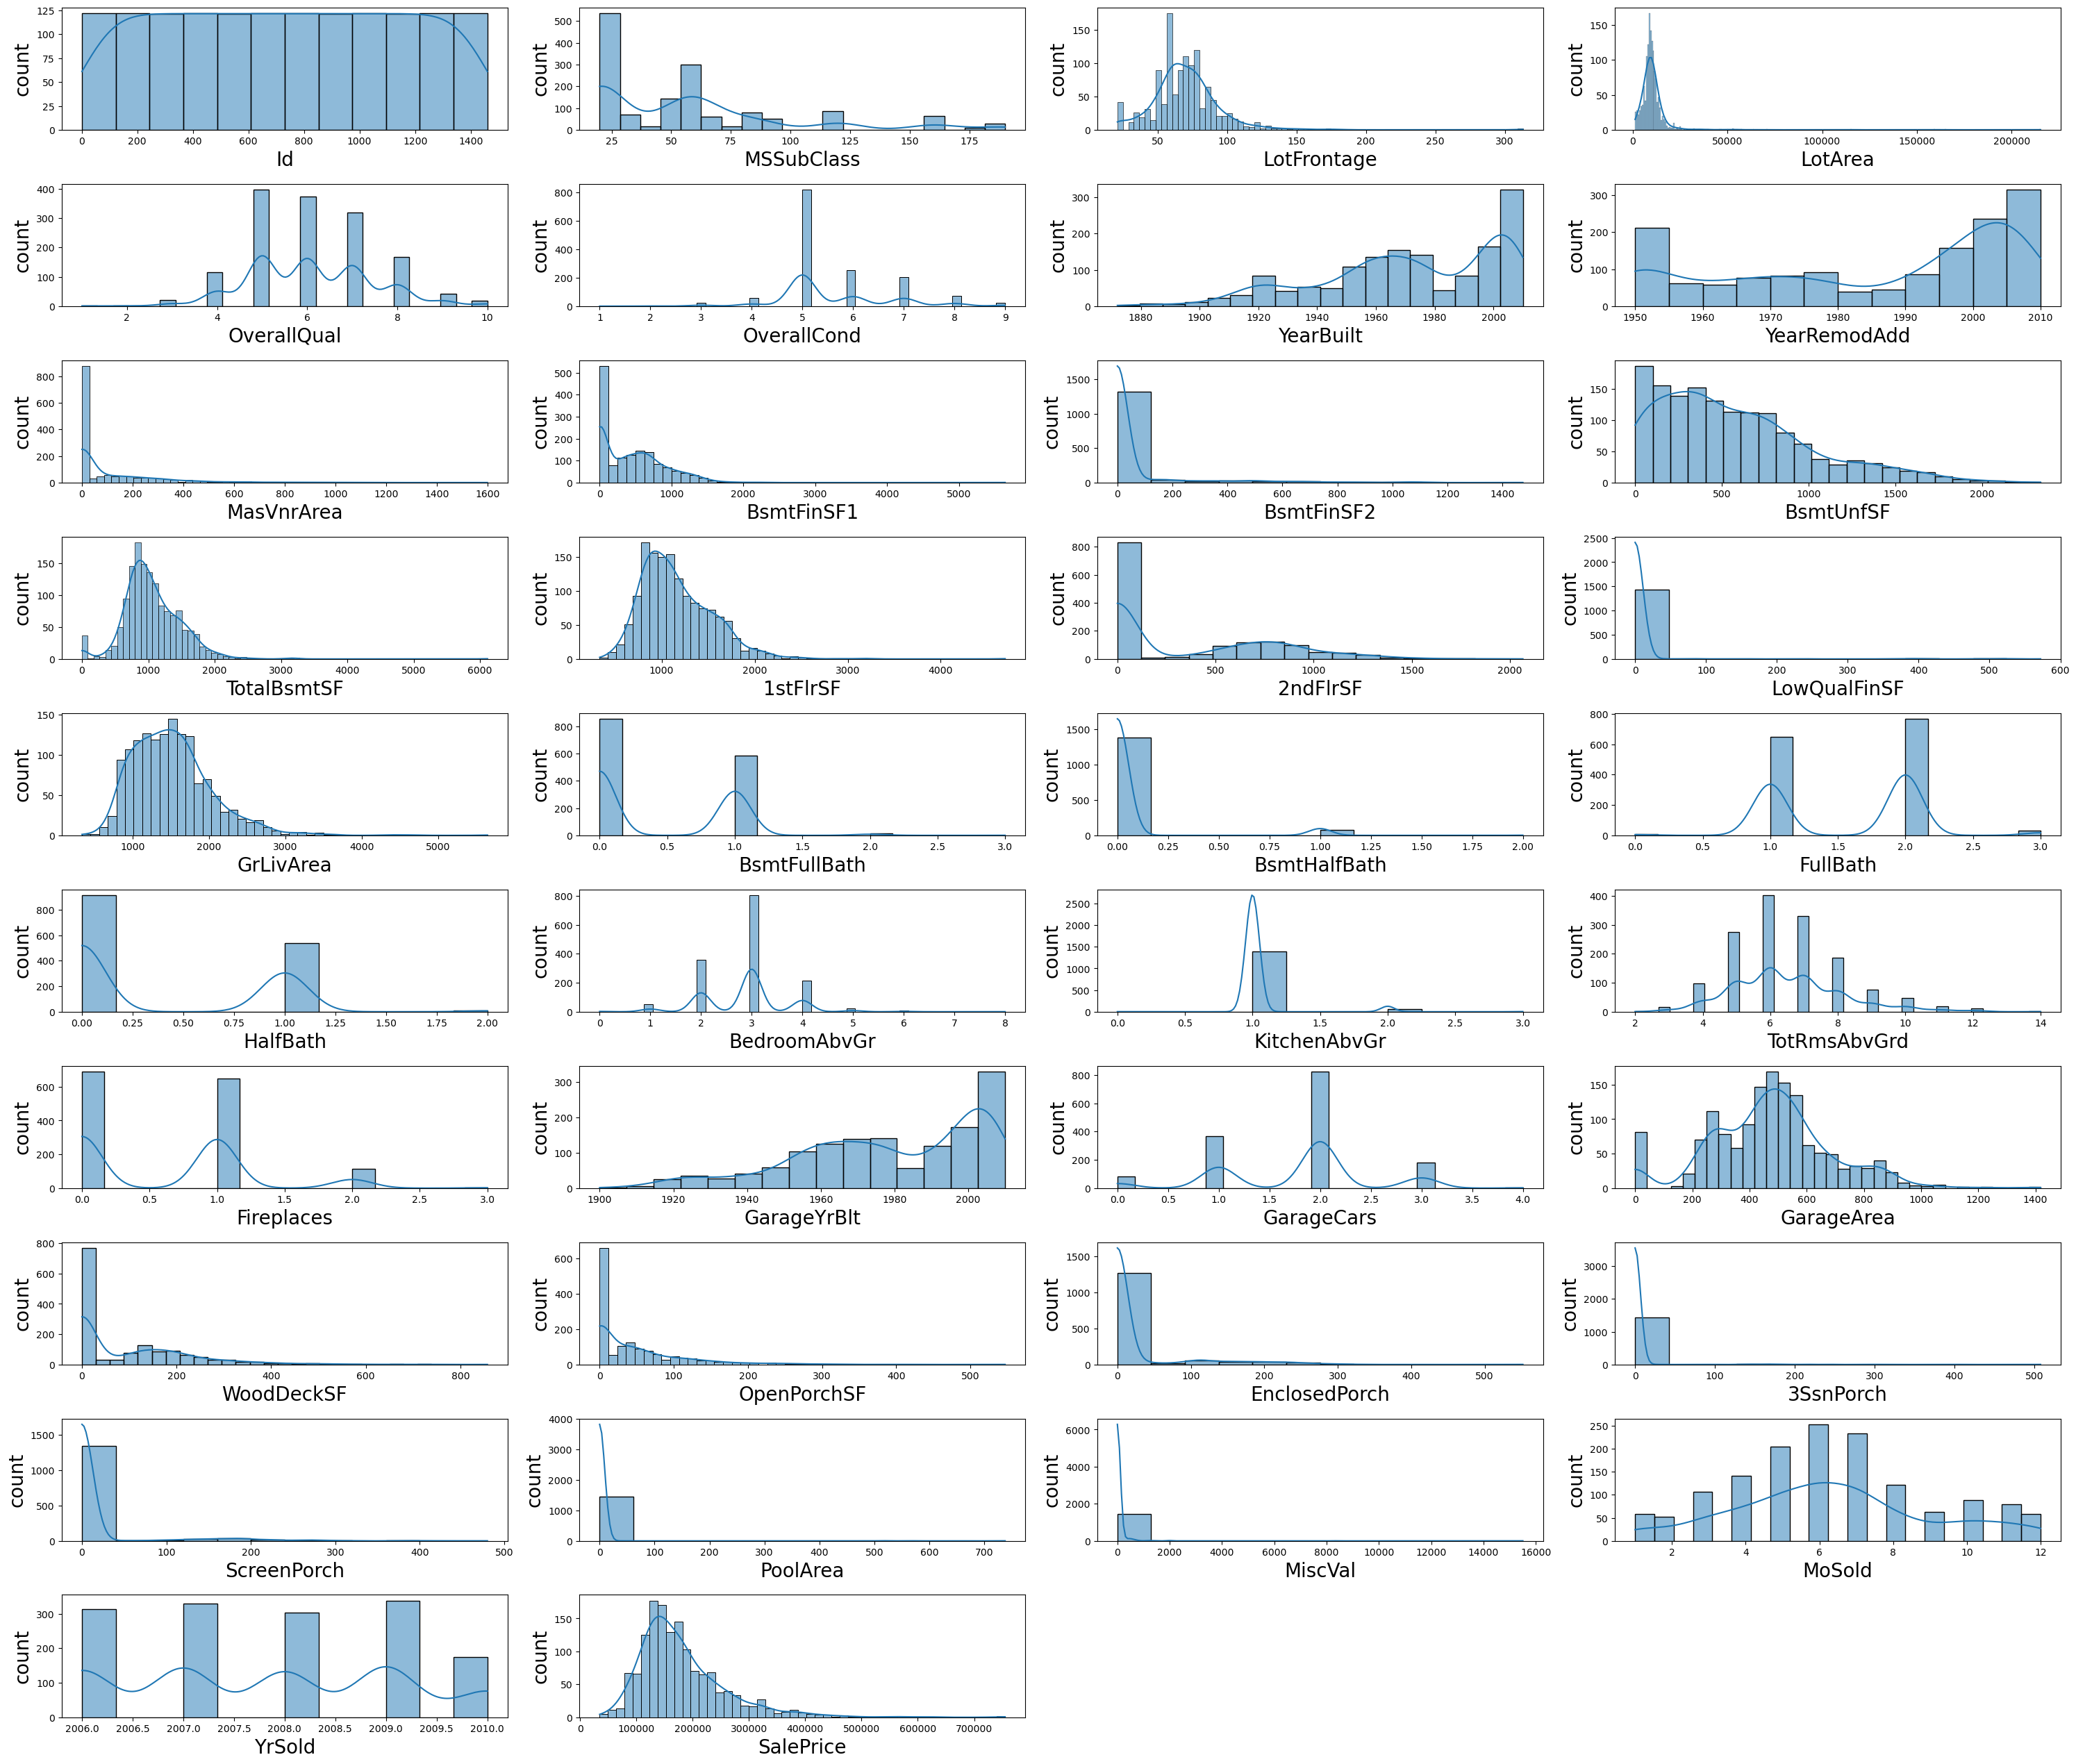

In [21]:
plt.figure(figsize=(30,30),facecolor='white')
plotnumber=1
for column in numerical_data:
    if plotnumber<=38:
        ax=plt.subplot(12,4,plotnumber)
        sns.histplot(numerical_data[column],kde=True)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('count',fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

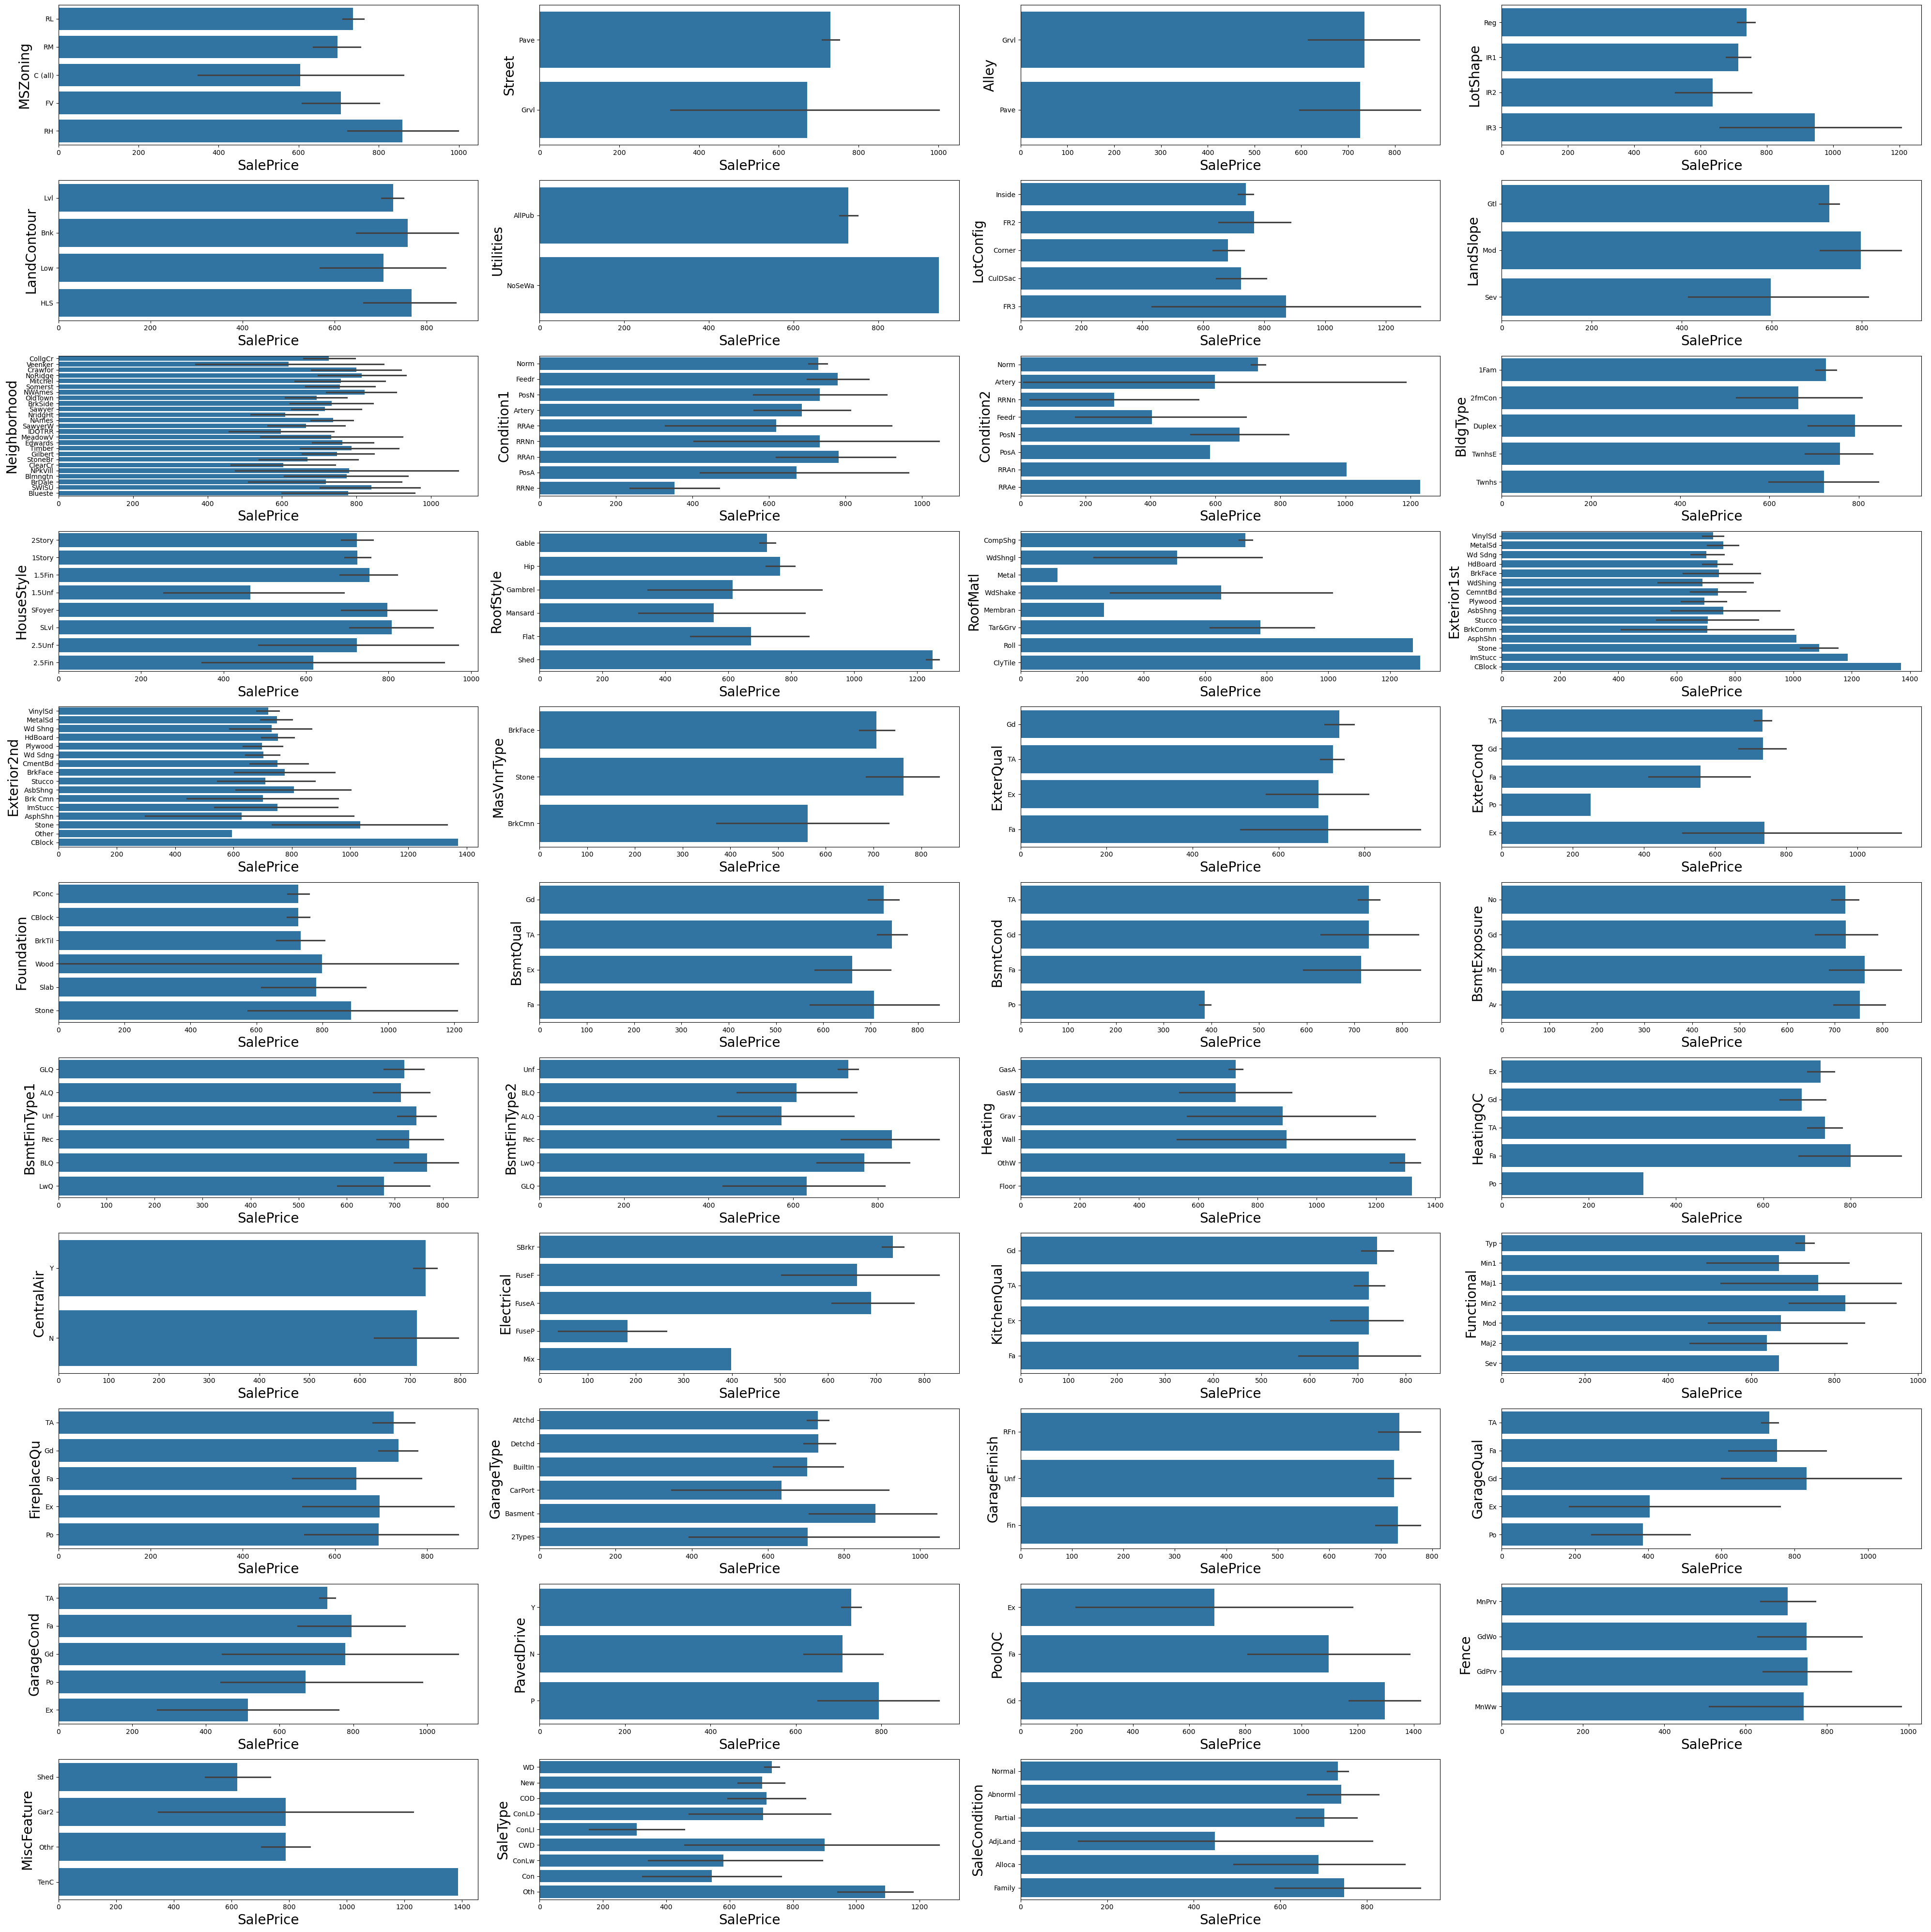

In [22]:
plt.figure(figsize=(40,40),facecolor='white')
plotnumber=1
for column in categorical_data:
    if plotnumber<=43:
        ax=plt.subplot(11,4,plotnumber)
        sns.barplot(categorical_data[column])
        plt.xlabel('SalePrice',fontsize=20)
        plt.ylabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

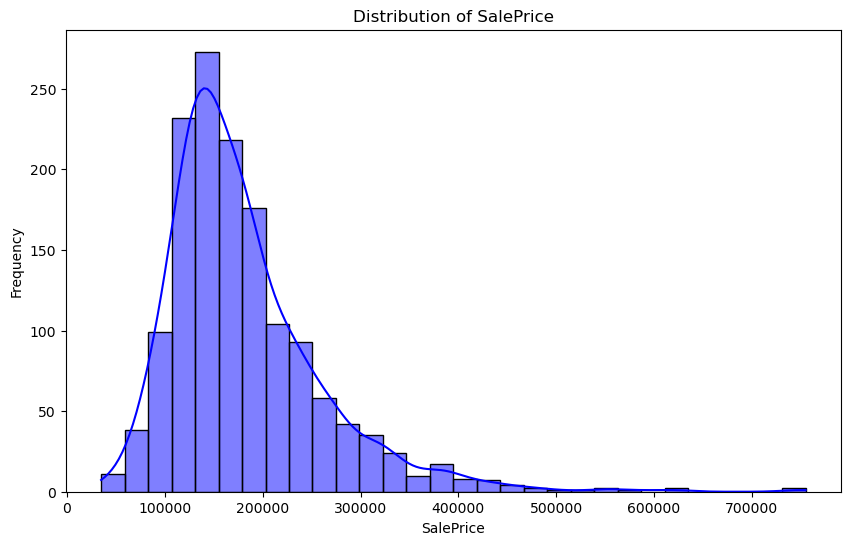

In [23]:
# SalePrice distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['SalePrice'], kde=True, color='blue', bins=30)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()


The distribution of SalePrice is skewed to the right (positively skewed). This means that there are more houses with lower sale prices and fewer houses with higher sale prices.

The most frequent sale price range is around 150000 to 200000 and there is a significant variation in sale prices.



##### Numerical Variables

In [26]:
numerical_data

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,1999.0,2,460,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,1978.0,2,500,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1941.0,1,252,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,1029,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,1950.0,1,240,366,0,112,0,0,0,0,4,2010,142125


In [27]:
numerical_data.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [28]:
year_feature=[feature for feature in numerical_data if "Yr" in feature or "Year" in feature]
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [29]:
for feature in year_feature:
    print(feature,data[feature].unique())

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006.

In [30]:
# differentiating continuous and discrete features

#1.discrete features
discrete_features=[feature for feature in numerical_data if len(data[feature].unique())<25 and feature not in year_feature + ['Id']]
print('Discrete Variables Count:()',format(len(discrete_features)))
discrete_features

Discrete Variables Count:() 17


['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

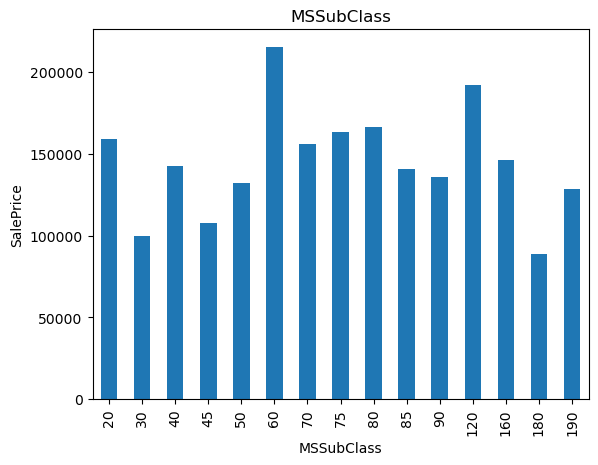

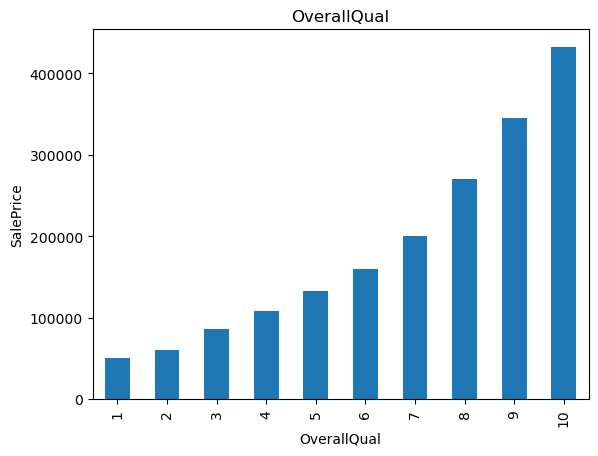

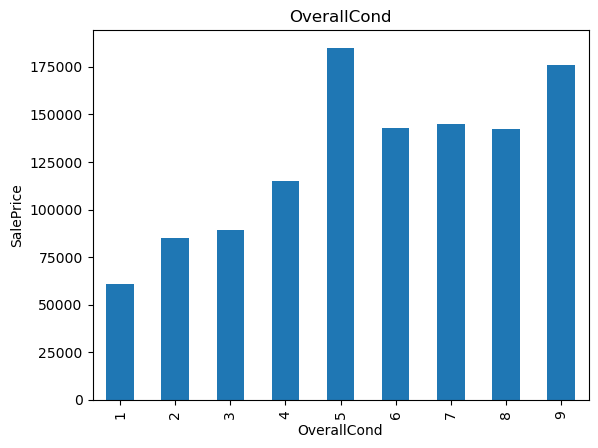

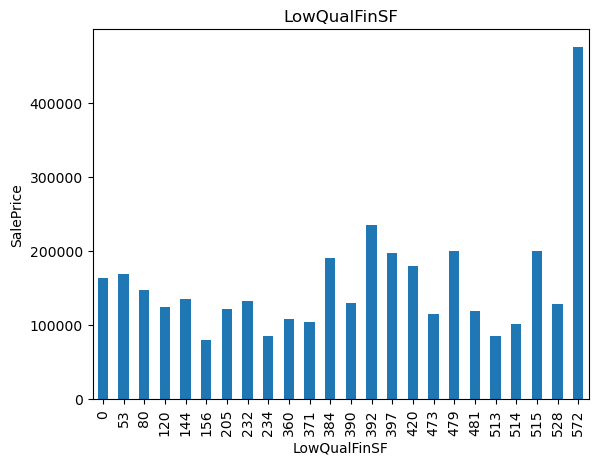

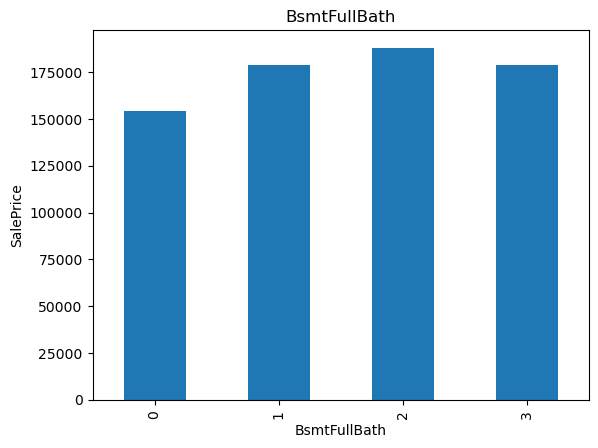

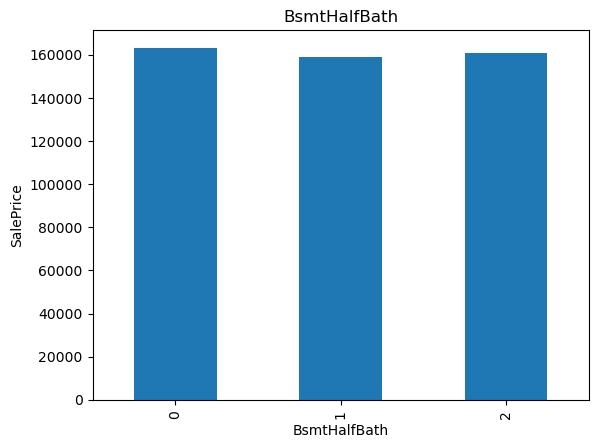

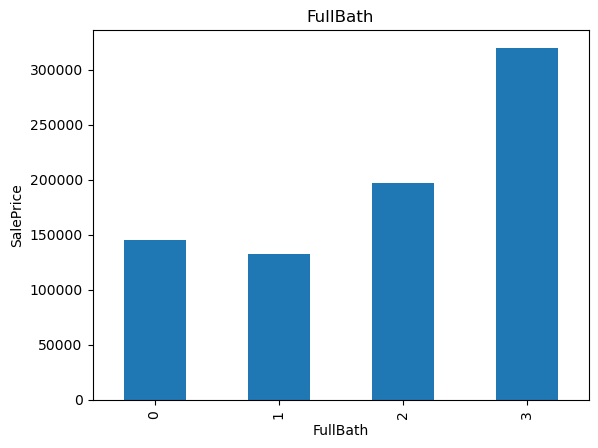

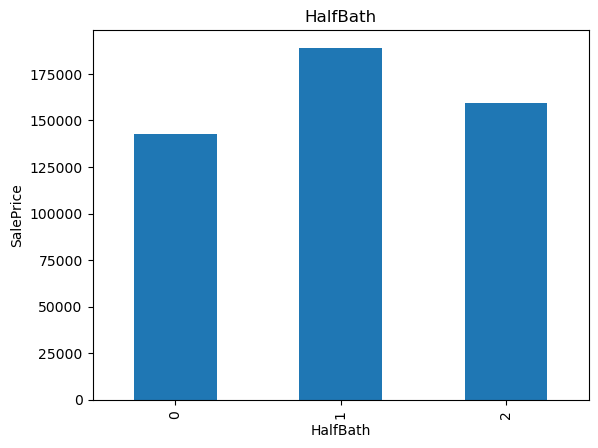

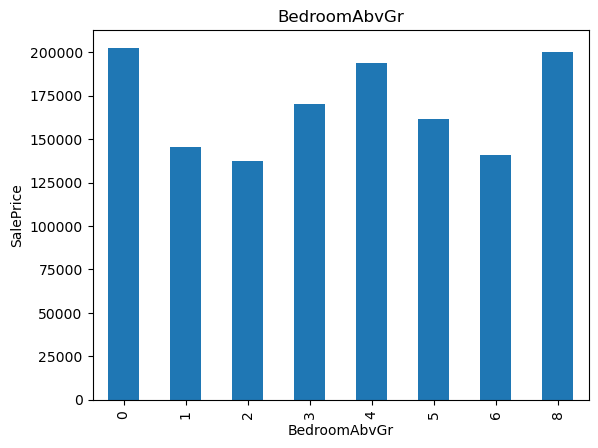

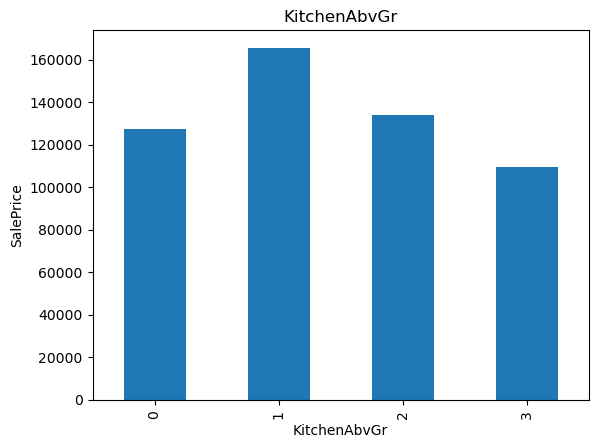

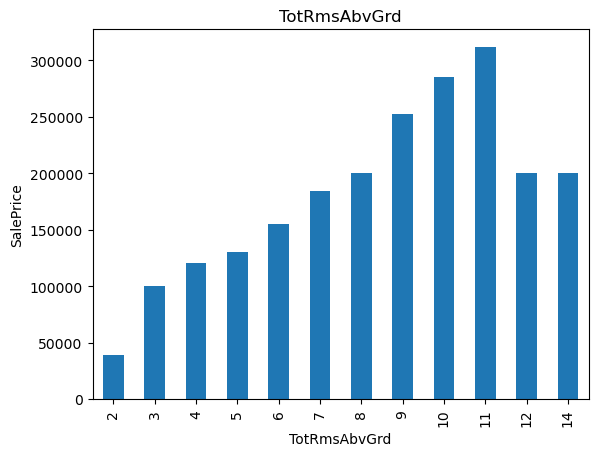

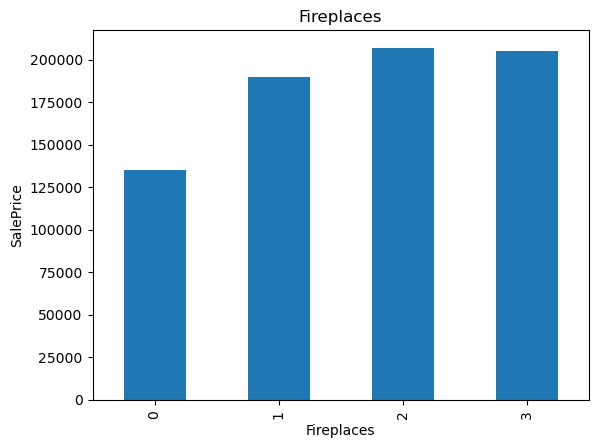

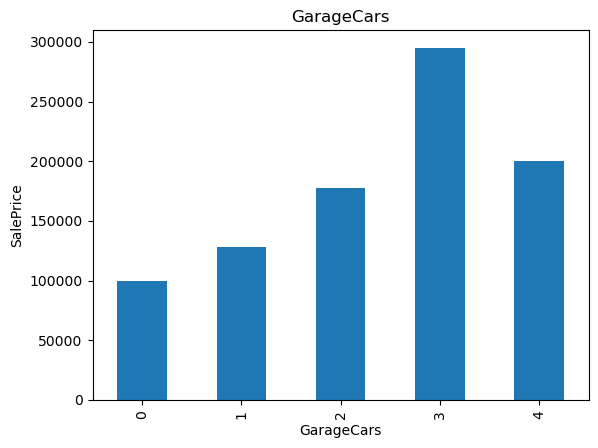

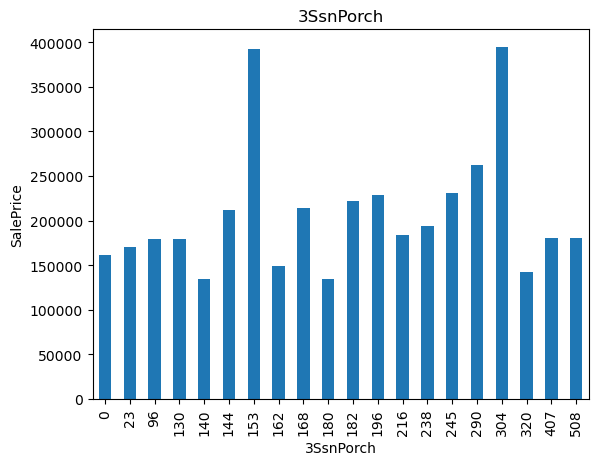

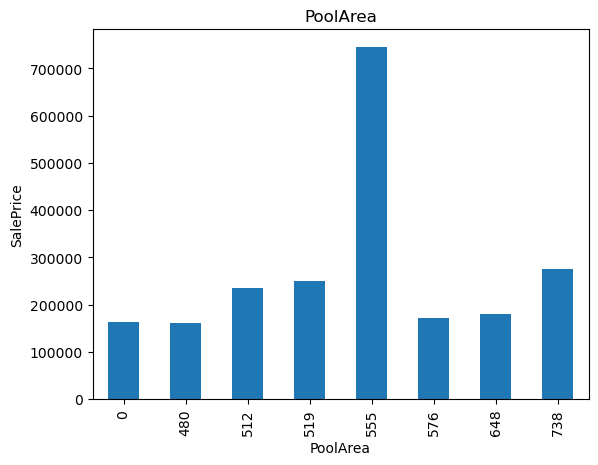

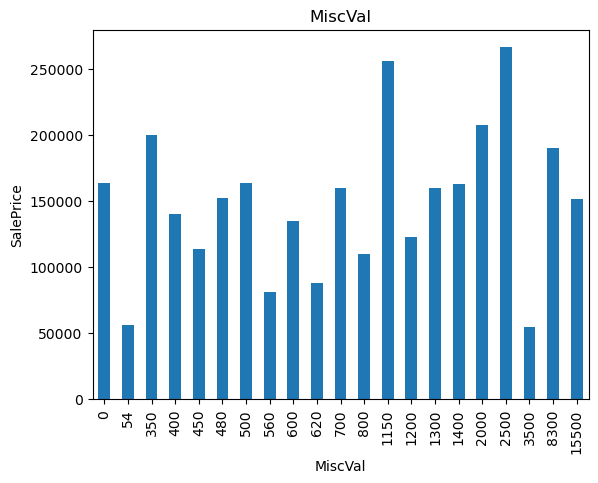

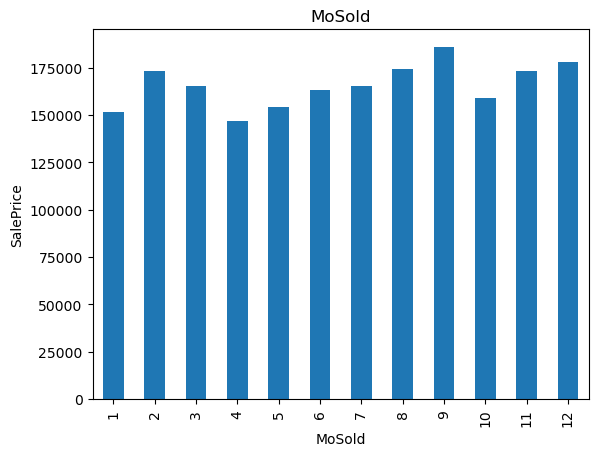

In [31]:
for feature in discrete_features:
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

In [32]:
# 2.Continuous features
continuous_features=[feature for feature in numerical_data if feature not in discrete_features+year_feature+['Id']]
print('Continuous feature Count:()',format(len(continuous_features)))
continuous_features

Continuous feature Count:() 16


['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

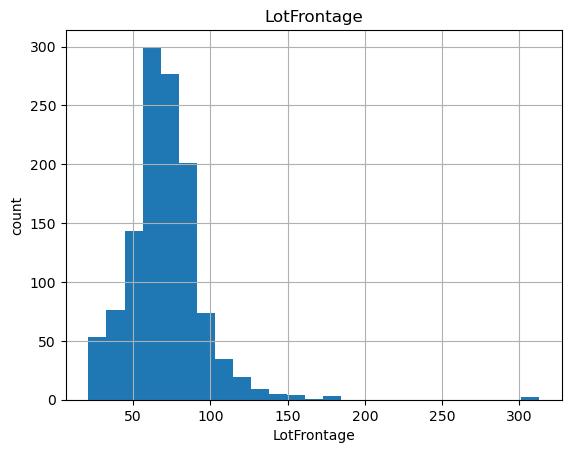

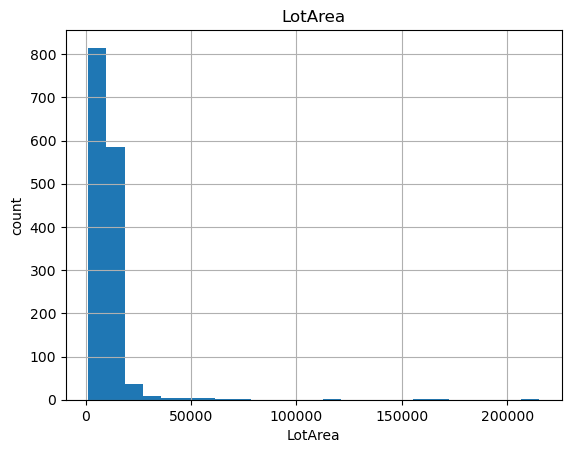

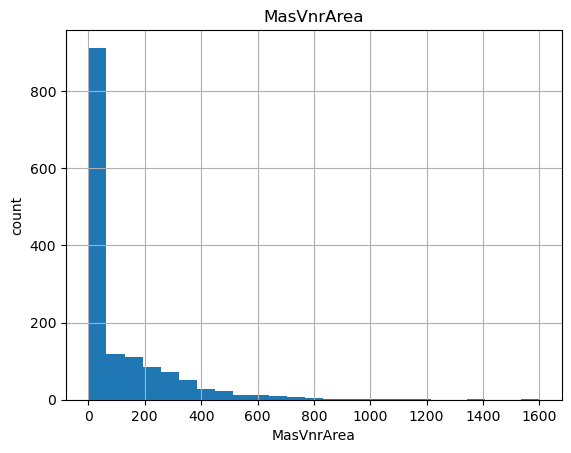

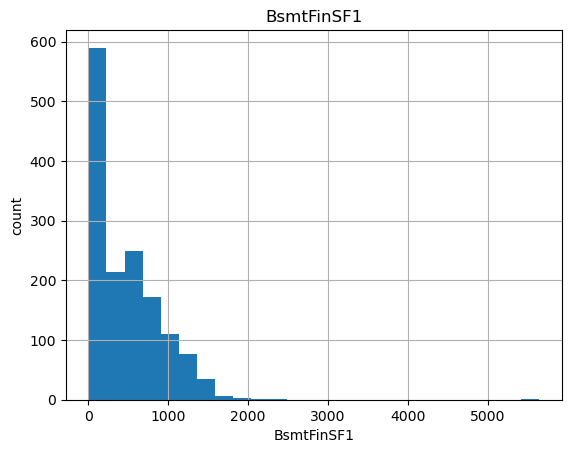

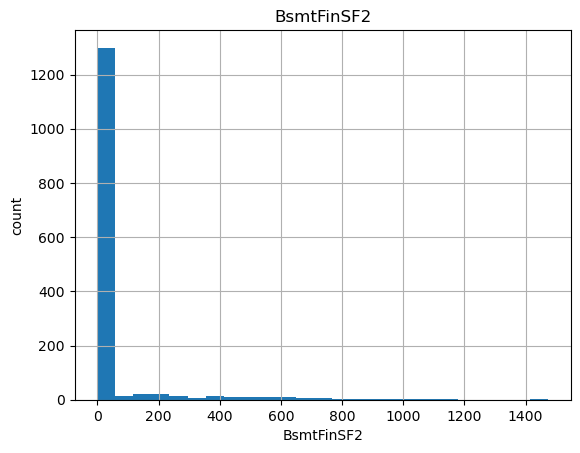

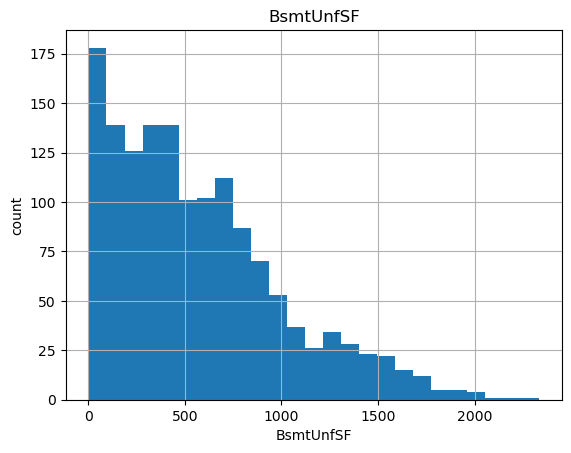

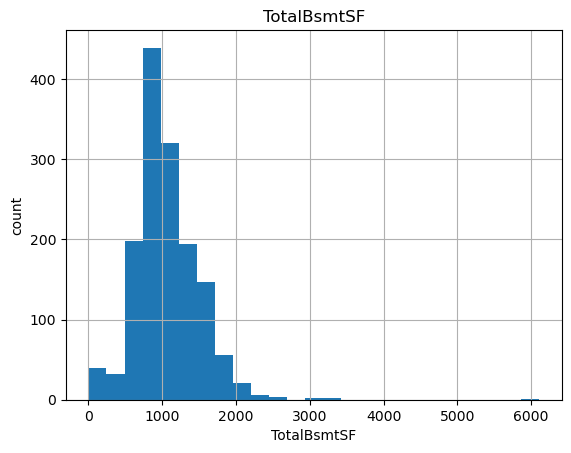

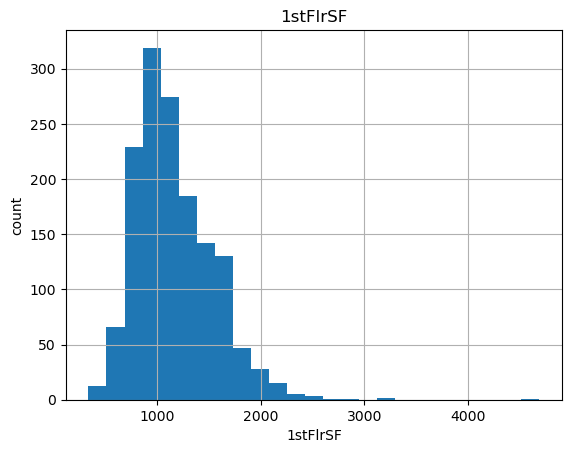

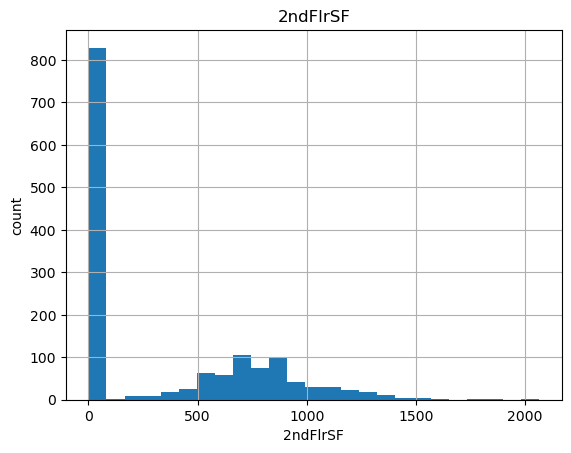

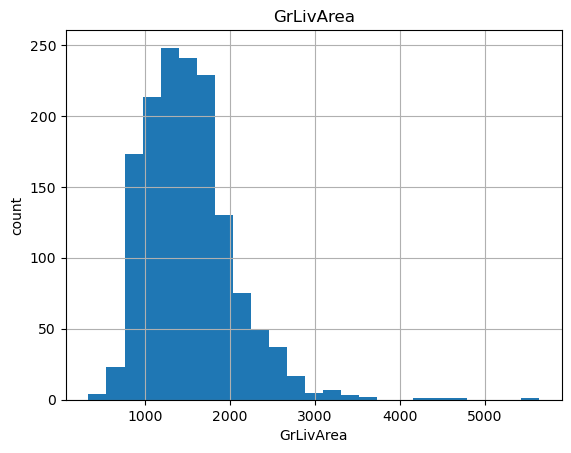

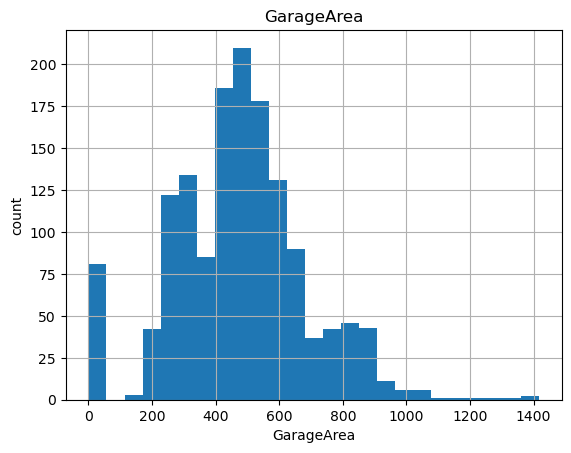

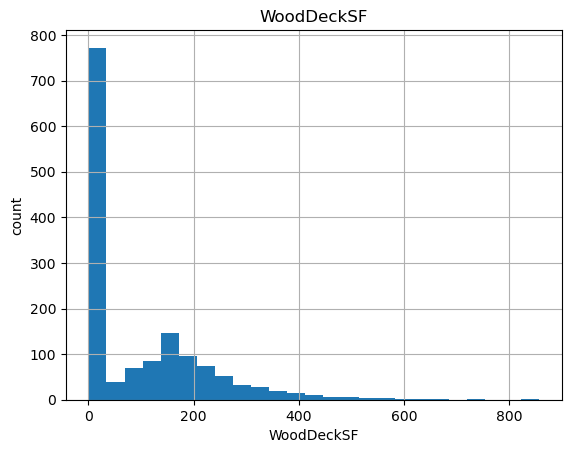

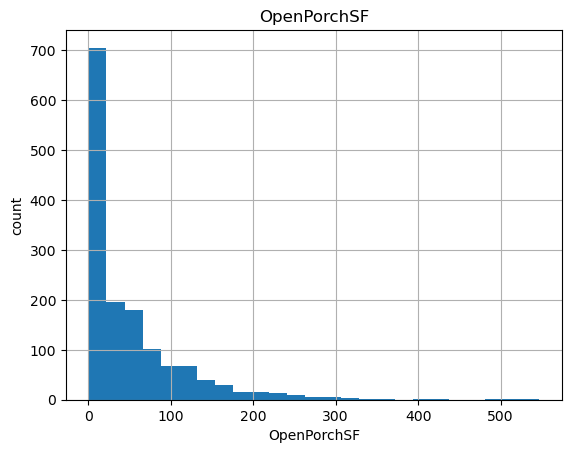

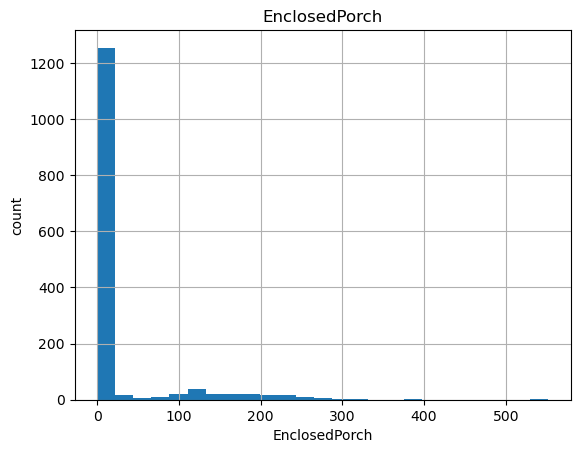

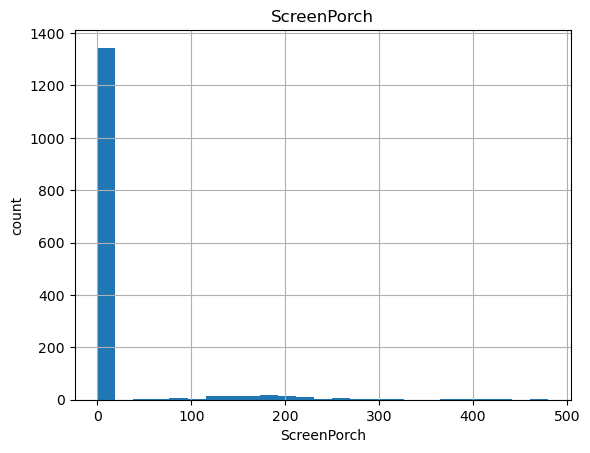

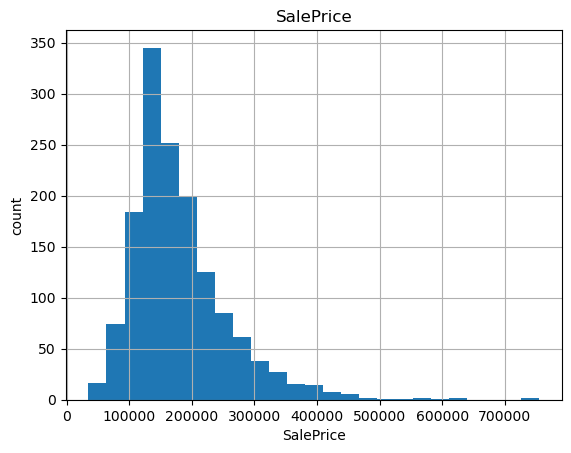

In [33]:
for feature in continuous_features:
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.title(feature)
    plt.show()

In [34]:
import sweetviz as sv
my_rep=sv.analyze(data)
my_rep.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [35]:
duplicate=data[data.duplicated()]
duplicate

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


There are no duplicate values in the given dataset

# Data Pre-Processing

### HANDLING NULL VALUES

In [39]:
data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [40]:
data.columns[data.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

The above columns has null values.

<Axes: >

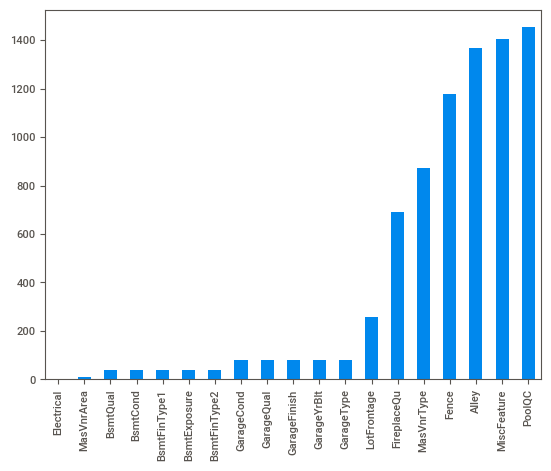

In [42]:
missing = data.isnull().sum()
missing=missing[missing>0]
missing.sort_values(inplace=True)
missing.plot.bar()

In [43]:
null_values_features=[features for features in data.columns if data[features].isnull().sum()]
null_values_features

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [44]:
for feature in null_values_features:
    print(feature, np.round(data[feature].isnull().sum()/len(data)*100), '%')

LotFrontage 18.0 %
Alley 94.0 %
MasVnrType 60.0 %
MasVnrArea 1.0 %
BsmtQual 3.0 %
BsmtCond 3.0 %
BsmtExposure 3.0 %
BsmtFinType1 3.0 %
BsmtFinType2 3.0 %
Electrical 0.0 %
FireplaceQu 47.0 %
GarageType 6.0 %
GarageYrBlt 6.0 %
GarageFinish 6.0 %
GarageQual 6.0 %
GarageCond 6.0 %
PoolQC 100.0 %
Fence 81.0 %
MiscFeature 96.0 %


Alley, poolqc, fence, miscfeature, masvnrtype this columns contain more 50% null values so its better to drop these columns.

In [46]:
data.drop(['Id','Alley','PoolQC','Fence','MiscFeature','MasVnrType'],axis=1, inplace=True)

##### Handling null values of numeric features

In [48]:
data['LotFrontage']=data['LotFrontage'].fillna(data['LotFrontage'].median())
data['MasVnrArea']=data['MasVnrArea'].fillna(data['MasVnrArea'].median())
data['GarageYrBlt']=data['GarageYrBlt'].fillna(data['GarageYrBlt'].median())


##### Handling null values of categorical features

In [50]:
data['BsmtQual']=data['BsmtQual'].fillna(data['BsmtQual'].mode()[0])
data['BsmtCond']=data['BsmtCond'].fillna(data['BsmtCond'].mode()[0])
data['BsmtExposure']=data['BsmtExposure'].fillna(data['BsmtExposure'].mode()[0])
data['BsmtFinType1']=data['BsmtFinType1'].fillna(data['BsmtFinType1'].mode()[0])
data['BsmtFinType2']=data['BsmtFinType2'].fillna(data['BsmtFinType2'].mode()[0])
data['FireplaceQu']=data['FireplaceQu'].fillna(data['FireplaceQu'].mode()[0])
data['GarageType']=data['GarageType'].fillna(data['GarageType'].mode()[0])
data['GarageFinish']=data['GarageFinish'].fillna(data['GarageFinish'].mode()[0])
data['GarageQual']=data['GarageQual'].fillna(data['GarageQual'].mode()[0])
data['GarageCond']=data['GarageCond'].fillna(data['GarageCond'].mode()[0])
data['Electrical']=data['Electrical'].fillna(data['Electrical'].mode()[0])

In [51]:
data.columns[data.isnull().any()]

Index([], dtype='object')

In [52]:
len(data.columns[data.isnull().any()])

0

# ENCODING

In [54]:
from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()

In [55]:
cat_cols = data.select_dtypes(include=['object']).columns

In [56]:
label_encoders = {}
for col in cat_cols:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])


In [57]:
num_column=[feature for feature in data.columns if data[feature].dtype !='O']
cat_column=[feature for feature in data.columns if data [feature].dtype=='O']

print('We have {} numerical columns:{}'.format(len(num_column),num_column))
print('\nWe have {} categorical columns:{}'.format(len(cat_column),cat_column))

We have 75 numerical columns:['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal

# FEATURE SELECTION

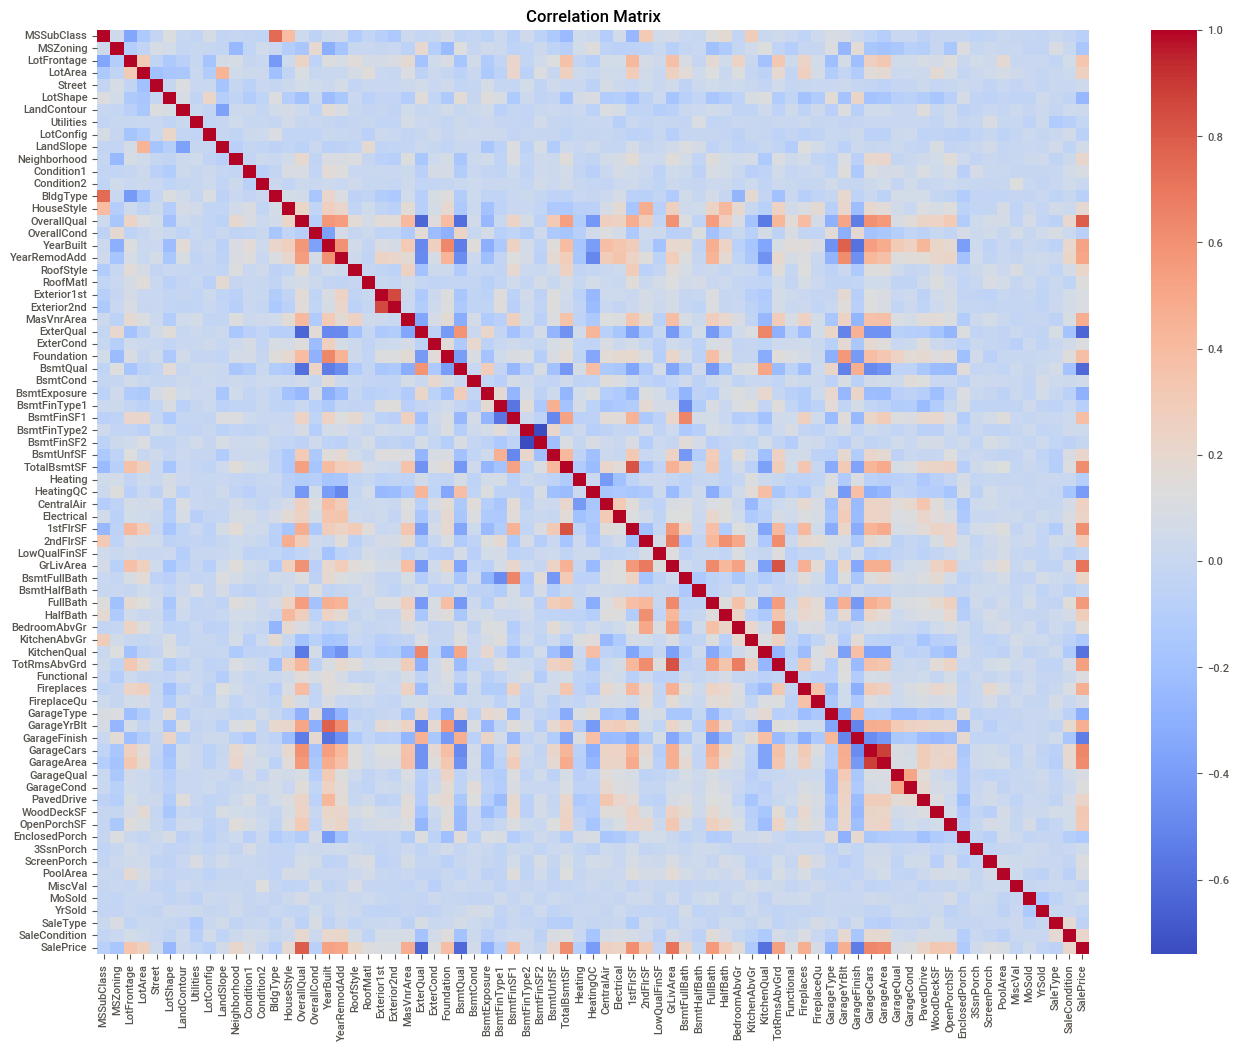

['MSSubClass',
 'Street',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Condition1',
 'Condition2',
 'BldgType',
 'OverallCond',
 'BsmtCond',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'Heating',
 'LowQualFinSF',
 'BsmtHalfBath',
 'FireplaceQu',
 'GarageQual',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SaleType']

In [59]:
# Compute the correlation matrix for numerical columns
corr_matrix = data.corr()

# Visualize the correlation matrix for better insights
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", fmt='.2f', cbar=True)
plt.title("Correlation Matrix")
plt.show()

# Find columns with low or no correlation to SalePrice (absolute correlation < 0.1)
low_corr_columns = corr_matrix['SalePrice'][corr_matrix['SalePrice'].abs() < 0.1].index.tolist()

low_corr_columns


 The above columns have very low correlation (absolute value < 0.1) with SalePrice, making them potential candidates for removal.

In [61]:
# Identify highly correlated features (absolute correlation > 0.8, excluding self-correlation)
threshold = 0.8
high_corr_pairs = [
    (col1, col2, corr_matrix.loc[col1, col2])
    for col1 in corr_matrix.columns
    for col2 in corr_matrix.columns
    if col1 != col2 and abs(corr_matrix.loc[col1, col2]) > threshold
]

# Prepare a list of highly correlated column pairs and display
high_corr_pairs_sorted = sorted(high_corr_pairs, key=lambda x: -abs(x[2]))
high_corr_pairs_sorted[:10], len(high_corr_pairs_sorted)  # Show top 10 high-correlation pairs

([('GarageCars', 'GarageArea', 0.882475414281462),
  ('GarageArea', 'GarageCars', 0.882475414281462),
  ('Exterior1st', 'Exterior2nd', 0.8541629837325787),
  ('Exterior2nd', 'Exterior1st', 0.8541629837325787),
  ('GrLivArea', 'TotRmsAbvGrd', 0.8254893743088425),
  ('TotRmsAbvGrd', 'GrLivArea', 0.8254893743088425),
  ('TotalBsmtSF', '1stFlrSF', 0.8195299750050339),
  ('1stFlrSF', 'TotalBsmtSF', 0.8195299750050339)],
 8)

##### Highly Correlated Column Pairs (Absolute Correlation > 0.8)
 GarageCars and GarageArea: Correlation = 0.88

 YearBuilt and GarageYrBlt: Correlation = 0.83

 GrLivArea and TotRmsAbvGrd: Correlation = 0.83

 TotalBsmtSF and 1stFlrSF: Correlation = 0.82

 These pairs indicate redundancy, as both columns in each pair carry similar information.

In [63]:
drop_col=['MSSubClass','Street', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
          'Condition1', 'Condition2', 'BldgType', 'OverallCond', 'BsmtCond', 
          'BsmtFinType1','BsmtFinType2', 'BsmtFinSF2', 'Heating', 'LowQualFinSF',
          'BsmtHalfBath', 'FireplaceQu', 'GarageQual', '3SsnPorch', 'PoolArea',
          'MiscVal', 'MoSold','YrSold', 'SaleType', 'GarageCars', 'GarageArea',
          'GrLivArea', 'TotRmsAbvGrd','1stFlrSF', 'TotalBsmtSF','GarageYrBlt','YearBuilt']

In [64]:
data.drop(drop_col,axis=1,inplace=True)

In [65]:
data.shape

(1460, 42)

In [66]:
data

,MSZoning,LotFrontage,LotArea,LotShape,Neighborhood,HouseStyle,OverallQual,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinSF1,BsmtUnfSF,HeatingQC,CentralAir,Electrical,2ndFlrSF,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,GarageType,GarageFinish,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SaleCondition,SalePrice
0,3,65.0,8450,3,5,5,7,2003,1,1,12,13,196.0,2,4,2,2,3,706,150,0,1,4,854,1,2,1,3,1,2,6,0,1,1,4,2,0,61,0,0,4,208500
1,3,80.0,9600,3,24,2,6,1976,1,1,8,8,0.0,3,4,1,2,1,978,284,0,1,4,0,0,2,0,3,1,3,6,1,1,1,4,2,298,0,0,0,4,181500
2,3,68.0,11250,0,5,5,7,2002,1,1,12,13,162.0,2,4,2,2,2,486,434,0,1,4,866,1,2,1,3,1,2,6,1,1,1,4,2,0,42,0,0,4,223500
3,3,60.0,9550,0,6,5,7,1970,1,1,13,15,0.0,3,4,0,3,3,216,540,2,1,4,756,1,1,0,3,1,2,6,1,5,2,4,2,0,35,272,0,0,140000
4,3,84.0,14260,0,15,5,8,2000,1,1,12,13,350.0,2,4,2,2,0,655,490,0,1,4,1053,1,2,1,4,1,2,6,1,1,1,4,2,192,84,0,0,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3,62.0,7917,3,8,5,6,2000,1,1,12,13,0.0,3,4,2,2,3,0,953,0,1,4,694,0,2,1,3,1,3,6,1,1,1,4,2,0,40,0,0,4,175000
1456,3,85.0,13175,3,14,2,6,1988,1,1,9,10,119.0,3,4,1,2,3,790,589,4,1,4,0,1,2,0,3,1,3,2,2,1,2,4,2,349,0,0,0,4,210000
1457,3,66.0,9042,3,6,5,7,2006,1,1,5,5,0.0,0,2,4,3,3,275,877,0,1,4,1152,0,2,0,4,1,2,6,2,1,1,4,2,0,60,0,0,4,266500
1458,3,68.0,9717,3,12,2,5,1996,3,1,8,8,0.0,3,4,1,3,2,49,0,2,1,0,0,1,1,0,2,1,2,6,0,1,2,4,2,366,0,112,0,4,142125


# OUTLIERS

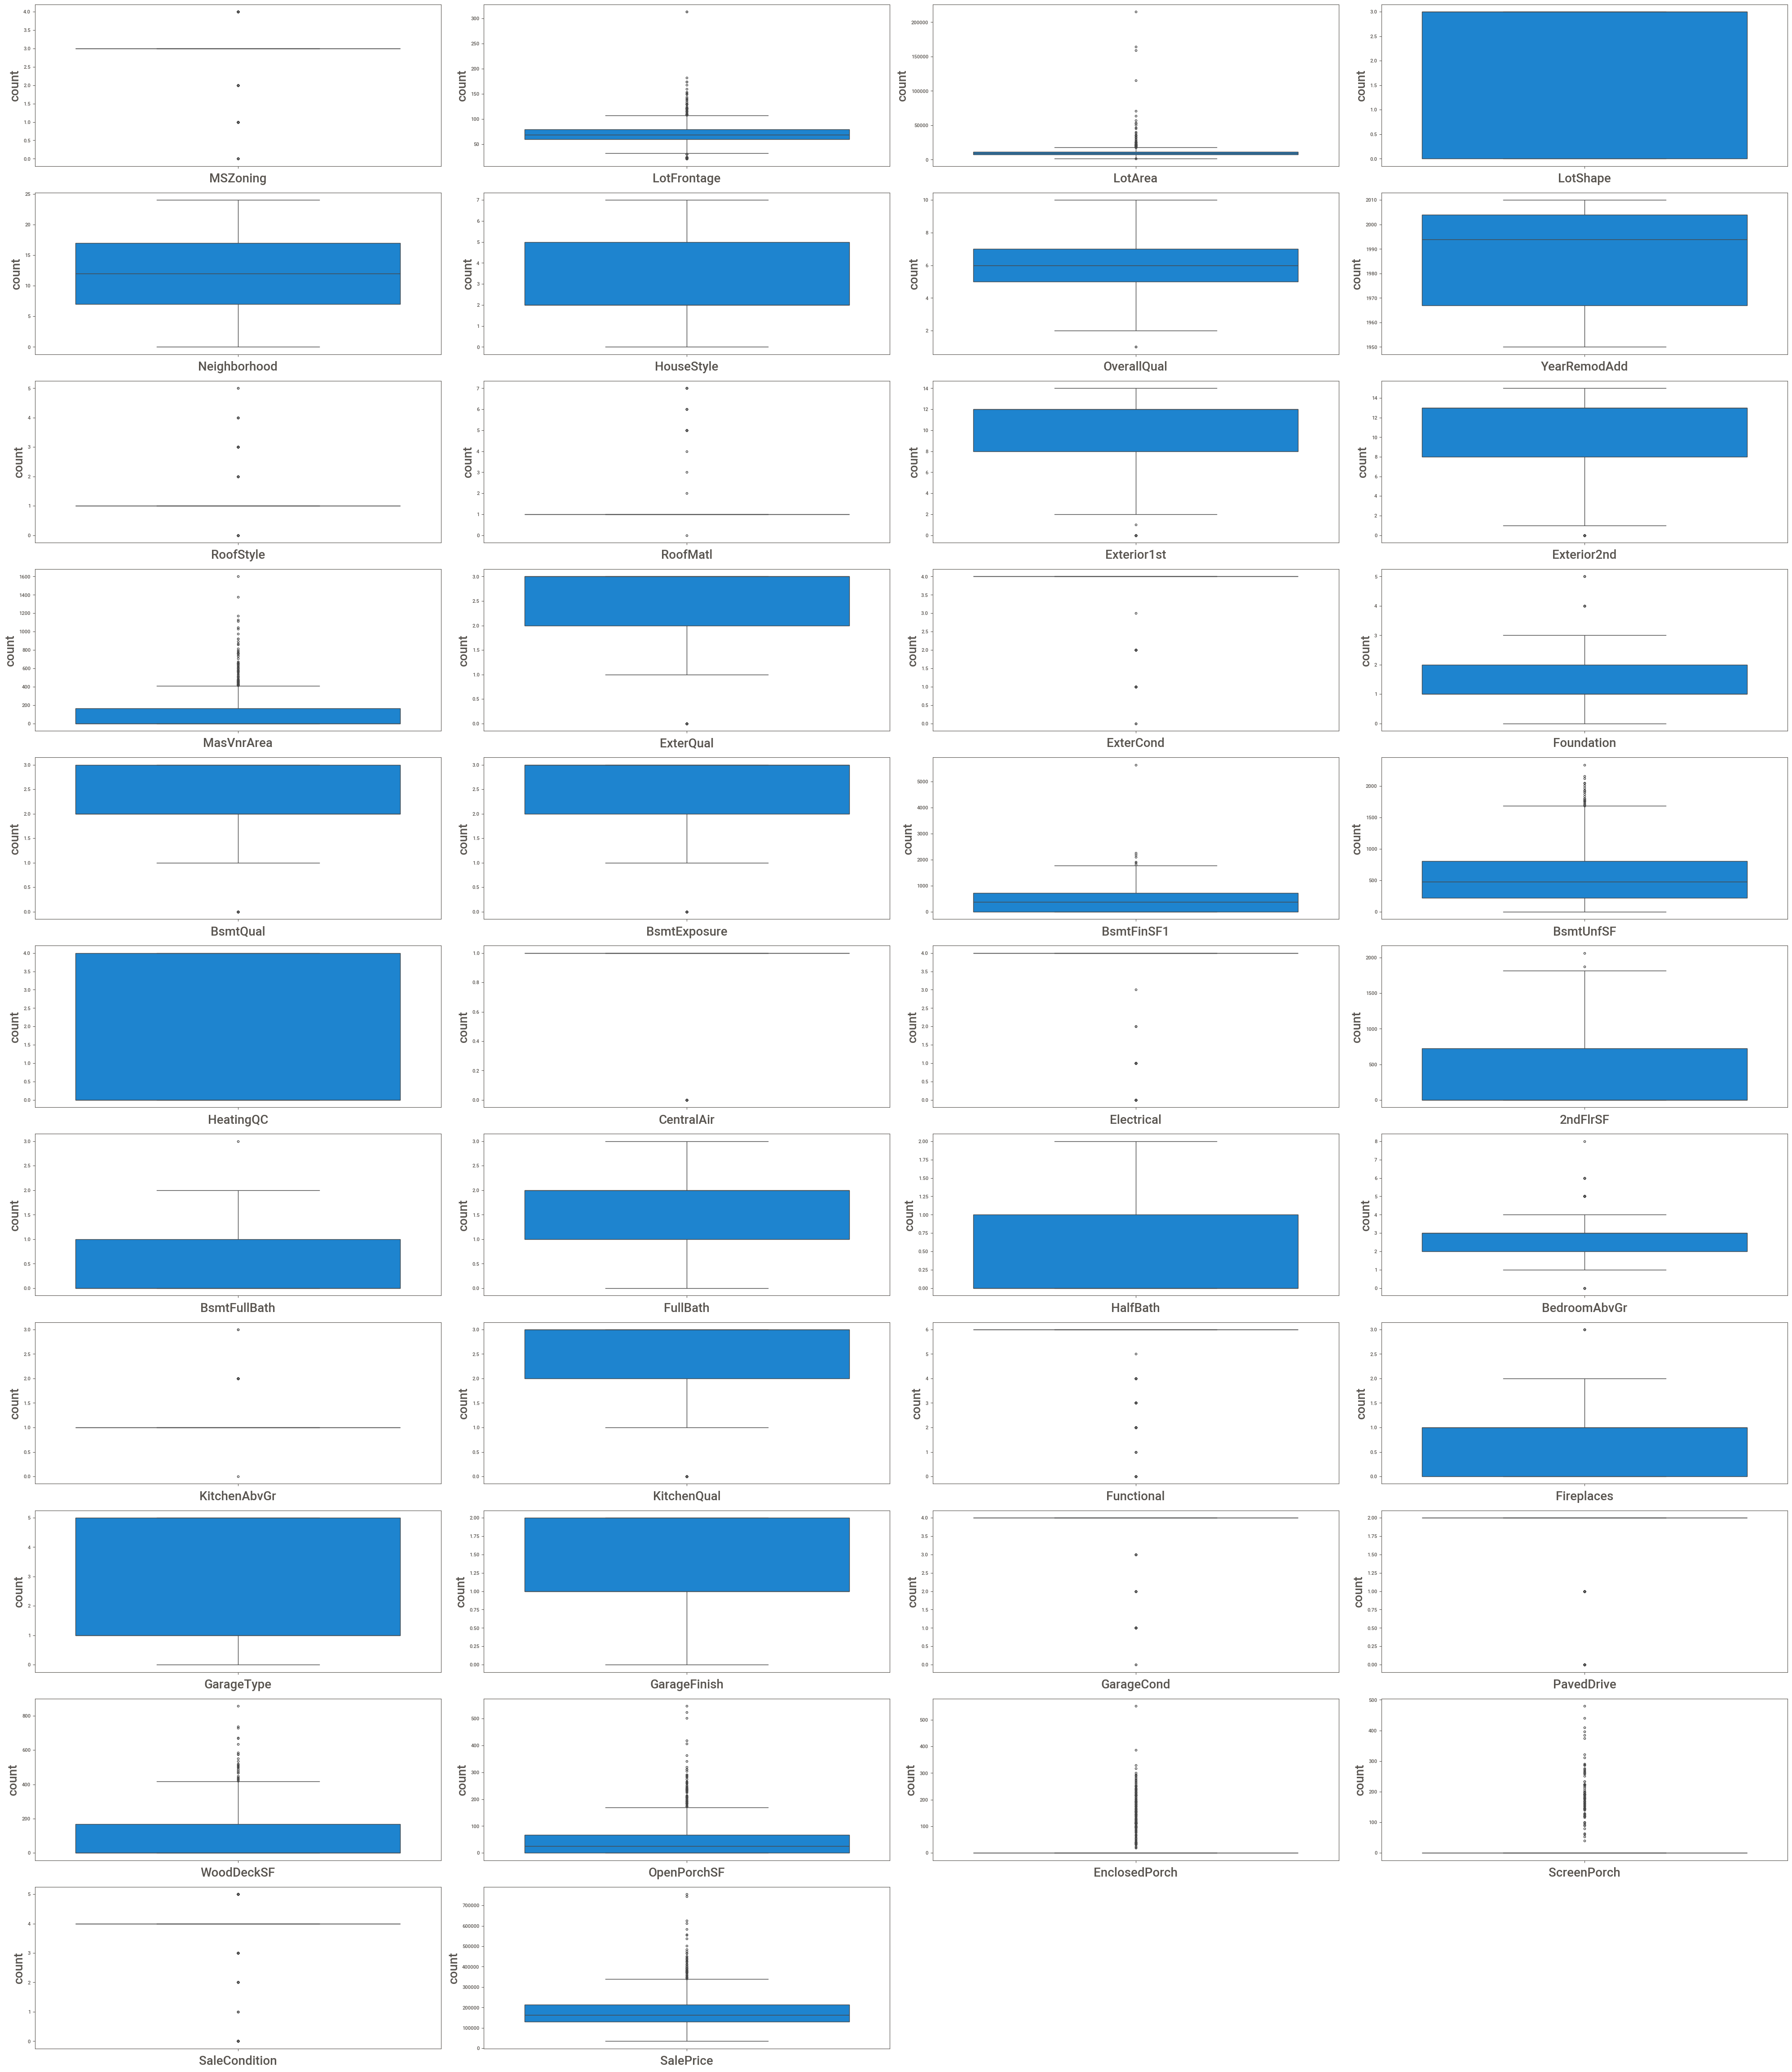

In [68]:
plt.figure(figsize=(40,50),facecolor='white')
plotnumber=1
for column in data:
    if plotnumber <=48:
        ax=plt.subplot(12,4,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('count',fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

In [69]:
def detect_and_capping_outliers(new_data,column):
    Q1=data[column].quantile(0.25)
    Q3=data[column].quantile(0.75)
    IQR= Q3 - Q1

    lower_bound= Q1 - 1.5 * IQR
    upper_bound= Q3 + 1.5 * IQR 

    data.loc[data[column]< lower_bound,column]=lower_bound
    data.loc[data[column]> upper_bound,column]=upper_bound

    return new_data

In [70]:
for column in data:
    data= detect_and_capping_outliers(data,column)

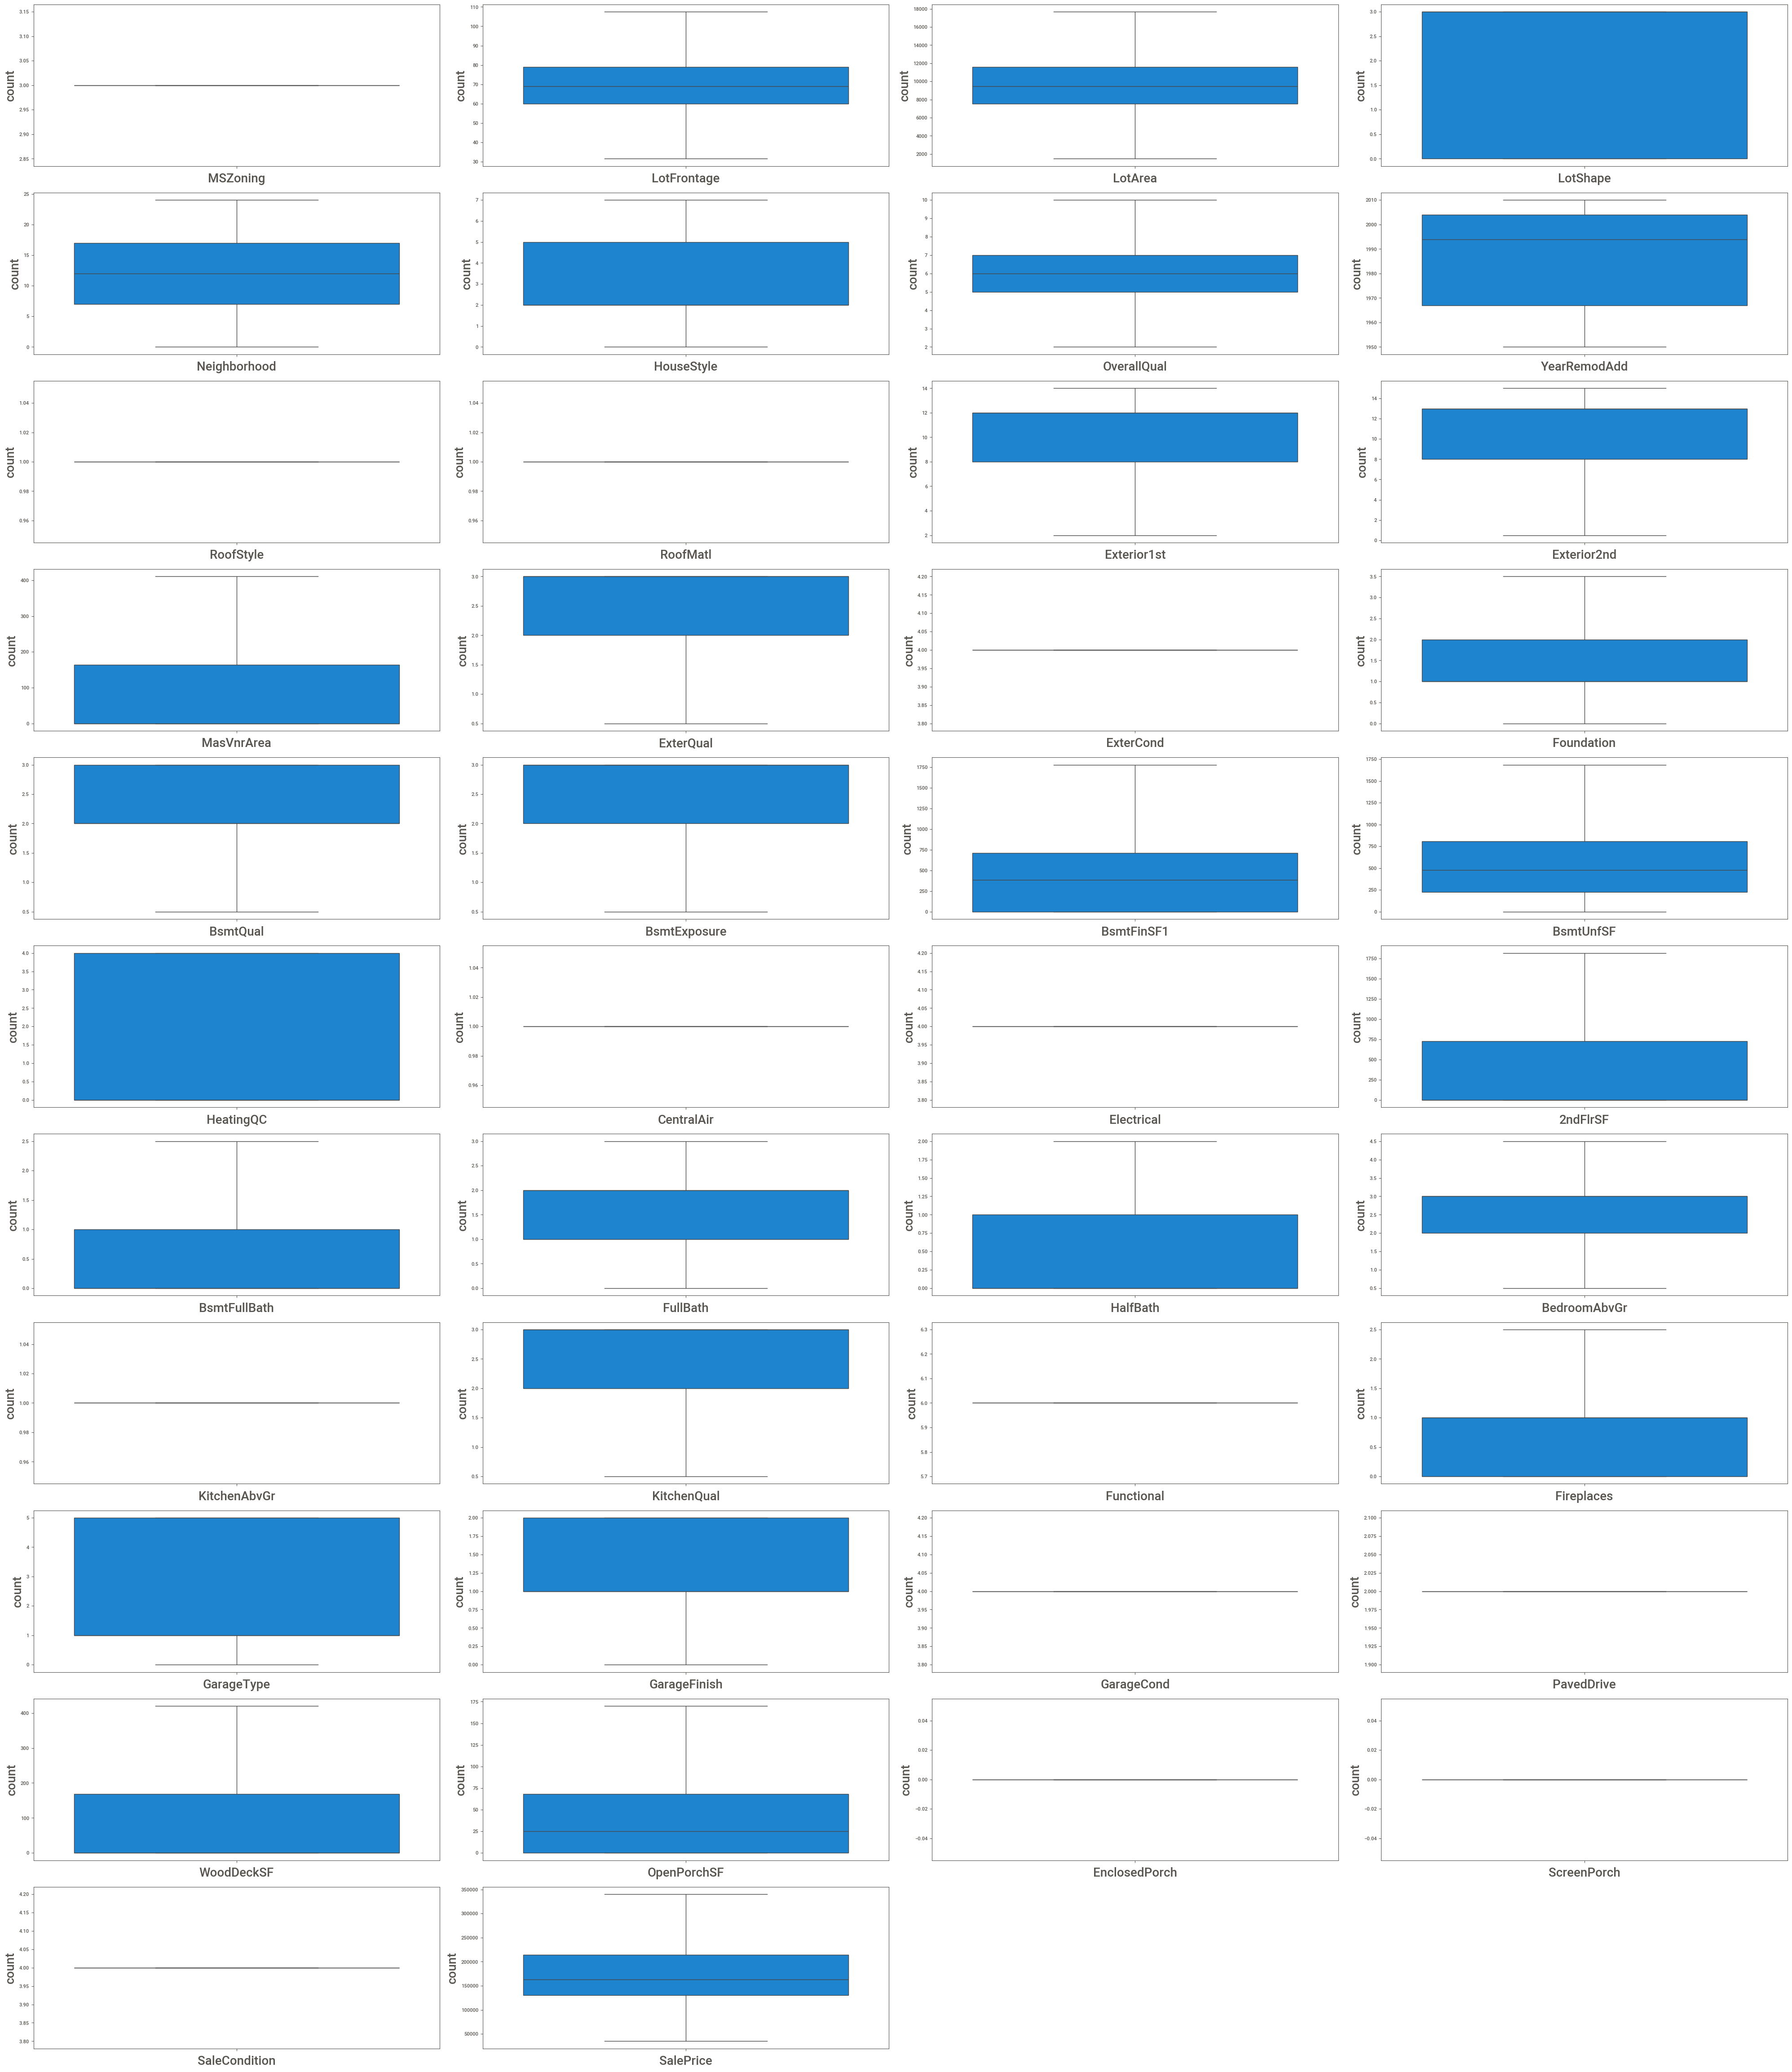

In [71]:
plt.figure(figsize=(40,50),facecolor='white')
plotnumber=1
for column in data:
    if plotnumber <=48:
        ax=plt.subplot(12,4,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('count',fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

# SCALING

In [73]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dl=['SalePrice']
data1=scaler.fit_transform(data.drop(dl,axis=1))

In [74]:
concat_data=data['SalePrice']
concat_data

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1455    175000.0
1456    210000.0
1457    266500.0
1458    142125.0
1459    147500.0
Name: SalePrice, Length: 1460, dtype: float64

In [75]:
data.columns

Index(['MSZoning', 'LotFrontage', 'LotArea', 'LotShape', 'Neighborhood',
       'HouseStyle', 'OverallQual', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinSF1', 'BsmtUnfSF',
       'HeatingQC', 'CentralAir', 'Electrical', '2ndFlrSF', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'Functional', 'Fireplaces', 'GarageType', 'GarageFinish', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       'ScreenPorch', 'SaleCondition', 'SalePrice'],
      dtype='object')

In [76]:
type(data1)
df=pd.DataFrame(data=data1, columns=['MSZoning', 'LotFrontage', 'LotArea', 'LotShape', 'Neighborhood',
       'HouseStyle', 'OverallQual', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinSF1', 'BsmtUnfSF',
       'HeatingQC', 'CentralAir', 'Electrical', '2ndFlrSF', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'Functional', 'Fireplaces', 'GarageType', 'GarageFinish', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       'ScreenPorch', 'SaleCondition'])

In [77]:
df

,MSZoning,LotFrontage,LotArea,LotShape,Neighborhood,HouseStyle,OverallQual,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinSF1,BsmtUnfSF,HeatingQC,CentralAir,Electrical,2ndFlrSF,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,GarageType,GarageFinish,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SaleCondition
0,0.0,-0.237456,-0.333244,0.750731,-1.206215,1.026689,0.652644,0.878668,0.0,0.0,0.752361,0.753863,0.795643,-0.882168,0.0,0.865665,-0.423383,0.646046,0.614224,-0.958790,-0.884658,0.0,0.0,1.164283,1.111765,0.789741,1.227585,0.195307,0.0,-0.506856,0.0,-0.957043,-0.686776,-0.281887,0.0,0.0,-0.787243,0.350520,0.0,0.0,0.0
1,0.0,0.633321,-0.013189,0.750731,1.954302,-0.543457,-0.073068,-0.429577,0.0,0.0,-0.529748,-0.666684,-0.667353,0.700099,0.0,-0.556812,-0.423383,-1.372633,1.242296,-0.648290,-0.884658,0.0,0.0,-0.796041,-0.821739,0.789741,-0.761621,0.195307,0.0,0.848473,0.0,0.608540,-0.686776,-0.281887,0.0,0.0,1.768105,-0.811747,0.0,0.0,0.0
2,0.0,-0.063300,0.446022,-1.378933,-1.206215,1.026689,0.652644,0.830215,0.0,0.0,0.752361,0.753863,0.541858,-0.882168,0.0,0.865665,-0.423383,-0.363293,0.106224,-0.300716,-0.884658,0.0,0.0,1.191828,1.111765,0.789741,1.227585,0.195307,0.0,-0.506856,0.0,0.608540,-0.686776,-0.281887,0.0,0.0,-0.787243,-0.011497,0.0,0.0,0.0
3,0.0,-0.527714,-0.027104,-1.378933,-1.039872,1.026689,0.652644,-0.720298,0.0,0.0,1.072888,1.322082,-0.667353,0.700099,0.0,-1.979289,0.893207,0.646046,-0.517230,-0.055097,0.265476,0.0,0.0,0.939328,1.111765,-1.026041,-0.761621,0.195307,0.0,-0.506856,0.0,0.608540,1.586905,0.950313,0.0,0.0,-0.787243,-0.144872,0.0,0.0,0.0
4,0.0,0.865528,1.283733,-1.378933,0.457215,1.026689,1.378355,0.733308,0.0,0.0,0.752361,0.753863,1.945140,-0.882168,0.0,0.865665,-0.423383,-1.877302,0.496460,-0.170955,-0.884658,0.0,0.0,1.621080,1.111765,0.789741,1.227585,1.512385,0.0,-0.506856,0.0,0.608540,-0.686776,-0.281887,0.0,0.0,0.859156,0.788753,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.0,-0.411611,-0.481583,0.750731,-0.707186,1.026689,-0.073068,0.733308,0.0,0.0,0.752361,0.753863,-0.667353,0.700099,0.0,0.865665,-0.423383,0.646046,-1.015994,0.901891,-0.884658,0.0,0.0,0.797009,-0.821739,0.789741,1.227585,0.195307,0.0,0.848473,0.0,0.608540,-0.686776,-0.281887,0.0,0.0,-0.787243,-0.049605,0.0,0.0,0.0
1456,0.0,0.923580,0.981767,0.750731,0.290872,-0.543457,-0.073068,0.151865,0.0,0.0,-0.209221,-0.098465,0.220895,0.700099,0.0,-0.556812,-0.423383,0.646046,0.808187,0.058444,1.415610,0.0,0.0,-0.796041,1.111765,0.789741,-0.761621,0.195307,0.0,0.848473,0.0,2.174122,-0.686776,0.950313,0.0,0.0,2.205430,-0.811747,0.0,0.0,0.0
1457,0.0,-0.179404,-0.168485,0.750731,-1.039872,1.026689,0.652644,1.024029,0.0,0.0,-1.491330,-1.519012,-0.667353,-3.255570,0.0,2.999381,0.893207,0.646046,-0.380994,0.725787,-0.884658,0.0,0.0,1.848330,-0.821739,0.789741,-0.761621,1.512385,0.0,-0.506856,0.0,2.174122,-0.686776,-0.281887,0.0,0.0,-0.787243,0.331467,0.0,0.0,0.0
1458,0.0,-0.063300,0.019374,0.750731,-0.041814,-0.543457,-0.798780,0.539493,0.0,0.0,-0.529748,-0.666684,-0.667353,0.700099,0.0,-0.556812,0.893207,-0.363293,-0.902848,-1.306365,0.265476,0.0,0.0,-0.796041,1.111765,-1.026041,-0.761621,-1.121772,0.0,-0.506856,0.0,-0.957043,-0.686776,0.950313,0.0,0.0,2.351205,-0.811747,0.0,0.0,0.0


In [78]:
dataframe=pd.concat([df,concat_data],axis=1)
dataframe

,MSZoning,LotFrontage,LotArea,LotShape,Neighborhood,HouseStyle,OverallQual,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinSF1,BsmtUnfSF,HeatingQC,CentralAir,Electrical,2ndFlrSF,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,GarageType,GarageFinish,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SaleCondition,SalePrice
0,0.0,-0.237456,-0.333244,0.750731,-1.206215,1.026689,0.652644,0.878668,0.0,0.0,0.752361,0.753863,0.795643,-0.882168,0.0,0.865665,-0.423383,0.646046,0.614224,-0.958790,-0.884658,0.0,0.0,1.164283,1.111765,0.789741,1.227585,0.195307,0.0,-0.506856,0.0,-0.957043,-0.686776,-0.281887,0.0,0.0,-0.787243,0.350520,0.0,0.0,0.0,208500.0
1,0.0,0.633321,-0.013189,0.750731,1.954302,-0.543457,-0.073068,-0.429577,0.0,0.0,-0.529748,-0.666684,-0.667353,0.700099,0.0,-0.556812,-0.423383,-1.372633,1.242296,-0.648290,-0.884658,0.0,0.0,-0.796041,-0.821739,0.789741,-0.761621,0.195307,0.0,0.848473,0.0,0.608540,-0.686776,-0.281887,0.0,0.0,1.768105,-0.811747,0.0,0.0,0.0,181500.0
2,0.0,-0.063300,0.446022,-1.378933,-1.206215,1.026689,0.652644,0.830215,0.0,0.0,0.752361,0.753863,0.541858,-0.882168,0.0,0.865665,-0.423383,-0.363293,0.106224,-0.300716,-0.884658,0.0,0.0,1.191828,1.111765,0.789741,1.227585,0.195307,0.0,-0.506856,0.0,0.608540,-0.686776,-0.281887,0.0,0.0,-0.787243,-0.011497,0.0,0.0,0.0,223500.0
3,0.0,-0.527714,-0.027104,-1.378933,-1.039872,1.026689,0.652644,-0.720298,0.0,0.0,1.072888,1.322082,-0.667353,0.700099,0.0,-1.979289,0.893207,0.646046,-0.517230,-0.055097,0.265476,0.0,0.0,0.939328,1.111765,-1.026041,-0.761621,0.195307,0.0,-0.506856,0.0,0.608540,1.586905,0.950313,0.0,0.0,-0.787243,-0.144872,0.0,0.0,0.0,140000.0
4,0.0,0.865528,1.283733,-1.378933,0.457215,1.026689,1.378355,0.733308,0.0,0.0,0.752361,0.753863,1.945140,-0.882168,0.0,0.865665,-0.423383,-1.877302,0.496460,-0.170955,-0.884658,0.0,0.0,1.621080,1.111765,0.789741,1.227585,1.512385,0.0,-0.506856,0.0,0.608540,-0.686776,-0.281887,0.0,0.0,0.859156,0.788753,0.0,0.0,0.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.0,-0.411611,-0.481583,0.750731,-0.707186,1.026689,-0.073068,0.733308,0.0,0.0,0.752361,0.753863,-0.667353,0.700099,0.0,0.865665,-0.423383,0.646046,-1.015994,0.901891,-0.884658,0.0,0.0,0.797009,-0.821739,0.789741,1.227585,0.195307,0.0,0.848473,0.0,0.608540,-0.686776,-0.281887,0.0,0.0,-0.787243,-0.049605,0.0,0.0,0.0,175000.0
1456,0.0,0.923580,0.981767,0.750731,0.290872,-0.543457,-0.073068,0.151865,0.0,0.0,-0.209221,-0.098465,0.220895,0.700099,0.0,-0.556812,-0.423383,0.646046,0.808187,0.058444,1.415610,0.0,0.0,-0.796041,1.111765,0.789741,-0.761621,0.195307,0.0,0.848473,0.0,2.174122,-0.686776,0.950313,0.0,0.0,2.205430,-0.811747,0.0,0.0,0.0,210000.0
1457,0.0,-0.179404,-0.168485,0.750731,-1.039872,1.026689,0.652644,1.024029,0.0,0.0,-1.491330,-1.519012,-0.667353,-3.255570,0.0,2.999381,0.893207,0.646046,-0.380994,0.725787,-0.884658,0.0,0.0,1.848330,-0.821739,0.789741,-0.761621,1.512385,0.0,-0.506856,0.0,2.174122,-0.686776,-0.281887,0.0,0.0,-0.787243,0.331467,0.0,0.0,0.0,266500.0
1458,0.0,-0.063300,0.019374,0.750731,-0.041814,-0.543457,-0.798780,0.539493,0.0,0.0,-0.529748,-0.666684,-0.667353,0.700099,0.0,-0.556812,0.893207,-0.363293,-0.902848,-1.306365,0.265476,0.0,0.0,-0.796041,1.111765,-1.026041,-0.761621,-1.121772,0.0,-0.506856,0.0,-0.957043,-0.686776,0.950313,0.0,0.0,2.351205,-0.811747,0.0,0.0,0.0,142125.0


# BALANCING
### The given dataset is of advanced regression task so balancing is not performed on regression task.

## TRAIN-TEST SPLIT

In [81]:
x=dataframe.iloc[:,:-1]
y=dataframe.SalePrice

In [82]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

## TASK 2.
### A.Create a robust machine learning algorithm to accurately predict the price of the house given the various factors across the market.      

## MODEL CREATION

1.Random Forest Regressor

2.Linear Rgression

3.XGBoosting 

4.Decision Tree Regressor

5.Gradient Boosting Regressor

#### 1.RANDOM FOREST REGRESSOR

In [86]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error


In [87]:
model = RandomForestRegressor(random_state=42)
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)

# Evaluate the model
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Random Forest Regression Performance:")
print(f'MAE:{mae}')
print(f'MSE:{mse}')
print(f'RMSE: {rmse}')
print(f'R² Score: {r2}')

Random Forest Regression Performance:
MAE:17689.040273972605
MSE:560731543.1273932
RMSE: 23679.77075749242
R² Score: 0.8806481670448622


##### Hyperparameter Tuning of Random Forest Regressor

In [89]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Depth of trees
    'min_samples_split': [2, 5, 10],  # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples in a leaf node
    'bootstrap': [True, False]  # Sampling method
}

# Create a Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Best estimator
best_model = grid_search.best_estimator_

y_pred_tuned = best_model.predict(x_test)

# Print evaluation for Random Forest Regression
print("Tuned Random Forest Regression Performance:")

tuned_MAE=mean_absolute_error(y_test,y_pred_tuned)
tuned_MSE=mean_squared_error(y_test,y_pred_tuned)
tuned_RMSE=np.sqrt(tuned_MSE)
tuned_R2 = r2_score(y_test, y_pred_tuned)

print(f'Tuned MAE:{tuned_MAE}')
print(f'Tuned MSE:{tuned_MSE}')
print(f'Tuned R²: {tuned_R2}')
print(f'Tuned RMSE: {tuned_RMSE}')
print(f'Max Value: {max(y_test)}\nMin Value: {min(y_test)}')

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
Tuned Random Forest Regression Performance:
Tuned MAE:17100.848981459894
Tuned MSE:532610925.6758168
Tuned R²: 0.8866336466880385
Tuned RMSE: 23078.364883063463
Max Value: 340037.5
Min Value: 35311.0


#### 2.LINEAR REGRESSION

In [91]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np

# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

# Make predictions on the test set
lr_pred = lr_model.predict(x_test)

# Calculate evaluation metrics for Linear Regression

mae = mean_absolute_error(y_test,lr_pred)
mse = mean_squared_error(y_test,lr_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, lr_pred)

# Print evaluation for Linear Regression
print("Linear Regression Performance:")

print(f'MAE:{mae}')
print(f'MSE:{mse}')
print(f'RMSE: {rmse}')
print(f'R² Score: {r2}')
print(f'Max Value: {max(y_test)}\nMin Value: {min(y_test)}')


Linear Regression Performance:
MAE:19009.35966993674
MSE:609852498.278029
RMSE: 24695.191804843893
R² Score: 0.8701927608784151
Max Value: 340037.5
Min Value: 35311.0


 ##### Hyperparameter Tuning of Linear RegressIon

In [93]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV


# Define the models and their respective hyperparameter grids
models = {
    'Ridge': {
        'model': Ridge(),
        'param_grid': {'alpha': [0.1, 1, 10, 100]}
    },
    'Lasso': {
        'model': Lasso(),
        'param_grid': {'alpha': [0.1, 1, 10, 100]}
    },
    'ElasticNet': {
        'model': ElasticNet(),
        'param_grid': {'alpha': [0.1, 1, 10], 'l1_ratio': [0.2, 0.5, 0.8]}
    }
}

# Perform grid search for each model
best_models = {}
for model_name, params in models.items():
    grid_search = GridSearchCV(estimator=params['model'], param_grid=params['param_grid'], 
                              scoring='neg_mean_squared_error', cv=5)
    grid_search.fit(x_train, y_train)
    best_models[model_name] = {
        'best_estimator': grid_search.best_estimator_,
        'best_params': grid_search.best_params_,
        'best_score': -grid_search.best_score_ 
    }

# Evaluate the best models on a hold-out set (if available)

for model_name, results in best_models.items():
    y_pred = results['best_estimator'].predict(x_test)
    mae_tuned = mean_absolute_error(y_test,y_pred)
    mse_tuned = mean_squared_error(y_test, y_pred)
    rmse_tuned = np.sqrt(mse)
    r2_tuned = r2_score(y_test, y_pred)

    
    print(f"{model_name}:")
    print(f"  Best Parameters: {results['best_params']}")
    print(f"  Best CV Score (neg_MSE): {results['best_score']:.2f}")
    print(f'Tuned MAE: {mae_tuned}')
    print(f"  Test MSE: {mse_tuned}")
    print(f"Tuned RMSE: {rmse_tuned}")
    print(f"Tuned R² Score: {r2_tuned}")
    print()

Ridge:
  Best Parameters: {'alpha': 10}
  Best CV Score (neg_MSE): 720479506.26
Tuned MAE: 18977.23557784932
  Test MSE: 608016392.2771329
Tuned RMSE: 24695.191804843893
Tuned R² Score: 0.8705835764467433

Lasso:
  Best Parameters: {'alpha': 0.1}
  Best CV Score (neg_MSE): 721790841.95
Tuned MAE: 19012.84870381662
  Test MSE: 610031600.3652464
Tuned RMSE: 24695.191804843893
Tuned R² Score: 0.8701546389595441

ElasticNet:
  Best Parameters: {'alpha': 0.1, 'l1_ratio': 0.5}
  Best CV Score (neg_MSE): 719875785.81
Tuned MAE: 18868.96827223399
  Test MSE: 603835371.9771584
Tuned RMSE: 24695.191804843893
Tuned R² Score: 0.871473507542186



### 3.XGBOOSTING

In [95]:
import xgboost as xgb

# Initialize and train the XGBoost model
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xg_reg.fit(x_train, y_train)

# Make predictions on the test set
xg_pred = xg_reg.predict(x_test)

# Calculate evaluation metrics for XGBoost
xg_mae = mean_absolute_error(y_test, xg_pred)
xg_mse = mean_squared_error(y_test,xg_pred)
xg_r2 = r2_score(y_test,xg_pred)
xg_rmse = np.sqrt(xg_mse)

# Print evaluation for XGBoost
print("\nXGBoost Performance:")
print(f'MAE:{xg_mae}')
print(f'MSE:{xg_mse}')
print(f'R²: {xg_r2}')
print(f'RMSE: {xg_rmse}')
print(f'Max Value: {max(y_test)}\nMin Value: {min(y_test)}')



XGBoost Performance:
MAE:17791.38332619863
MSE:591874593.0680501
R²: 0.8740193619780027
RMSE: 24328.47288812124
Max Value: 340037.5
Min Value: 35311.0


##### Hyperparameter Tuning of XGBoosting

In [97]:
from xgboost import XGBRegressor

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Create an XGBoost Regressor
xgb_model = XGBRegressor()

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, 
                          cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to your data
grid_search.fit(x_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model
best_xgb_model = grid_search.best_estimator_

# Make predictions on the test set
xg_y_pred = best_xgb_model.predict(x_test)

# Evaluate the model on the test set
tuned_MAE=mean_absolute_error(y_test,xg_y_pred)
tuned_MSE=mean_squared_error(y_test,xg_y_pred)
tuned_RMSE=np.sqrt(tuned_MSE)
tuned_R2 = r2_score(y_test, xg_y_pred)

print("\nTuned XGBoost Performance:")
print(f'Tuned MAE:{tuned_MAE}')
print(f'Tuned MSE:{tuned_MSE}')
print(f'Tuned R²: {tuned_R2}')
print(f'Tuned RMSE: {tuned_RMSE}')
print(f'Max Value: {max(y_test)}\nMin Value: {min(y_test)}')

Best Hyperparameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}

Tuned XGBoost Performance:
Tuned MAE:15789.673555222602
Tuned MSE:465419598.8184555
Tuned R²: 0.9009353354683537
Tuned RMSE: 21573.585673653222
Max Value: 340037.5
Min Value: 35311.0


#### 4.DECISION TREE REGRESSOR

In [99]:
from sklearn.tree import DecisionTreeRegressor

# Initialize and train the DecisionTreeRegressor model
DTR =DecisionTreeRegressor()
DTR.fit(x_train, y_train)

# Make predictions on the test set
dtr_pred = DTR.predict(x_test)

# Calculate evaluation metrics for DecisionTreeRegressor
dtr_mae = mean_absolute_error(y_test,dtr_pred)
dtr_mse = mean_squared_error(y_test,dtr_pred)
dtr_r2 = r2_score(y_test,dtr_pred)
dtr_rmse = np.sqrt(dtr_mse)

# Print evaluation for DecisionTreeRegressor
print("\nDecisionTreeRegressor Performance:")
print(f'MAE:{dtr_mae}')
print(f'MSE:{dtr_mse}')
print(f'R²: {dtr_r2}')
print(f'RMSE: {dtr_rmse}')
print(f'Max Value: {max(y_test)}\nMin Value: {min(y_test)}')


DecisionTreeRegressor Performance:
MAE:27704.364383561642
MSE:1628353915.930137
R²: 0.6534045088992178
RMSE: 40352.86750566974
Max Value: 340037.5
Min Value: 35311.0


##### Hyperparameter Tuning of Decision Tree Regressor

In [101]:
# Define hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': [None, 'sqrt', 'log2'],
    'max_leaf_nodes': [None, 10, 50]
}

# Initialize GridSearchCV for MSE
grid_search = GridSearchCV(
     DTR, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1
)

# Perform hyperparameter tuning
grid_search.fit(x_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model
best_dtr_model = grid_search.best_estimator_

# Make predictions on the test set
y_dtr_pred = best_dtr_model.predict(x_test)

# Evaluate the model on the test set
dtrm_MAE=mean_absolute_error(y_test,y_dtr_pred)
dtrm_MSE=mean_squared_error(y_test,y_dtr_pred)
dtrm_RMSE=np.sqrt(dtrm_MSE)
dtrm_R2 = r2_score(y_test, y_dtr_pred)

# Print evaluation for DecisionTreeRegressor
print("\nTuned Decision Tree Regressor Performance:")
print(f'Tuned MAE:{dtrm_MAE}')
print(f'Tuned MSE:{dtrm_MSE}')
print(f'Tuned R²: {dtrm_R2}')
print(f'Tuned RMSE: {dtrm_RMSE}')
print(f'Max Value: {max(y_test)}\nMin Value: {min(y_test)}')

Best Hyperparameters: {'max_depth': 10, 'max_features': None, 'max_leaf_nodes': 50, 'min_samples_leaf': 5, 'min_samples_split': 2}

Tuned Decision Tree Regressor Performance:
Tuned MAE:24353.929809579262
Tuned MSE:1107589763.7899957
Tuned R²: 0.7642492738443089
Tuned RMSE: 33280.47120745131
Max Value: 340037.5
Min Value: 35311.0


#### 5.GRADIENT BOOSTING

In [103]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize and train the GradientBoostingRegressor model
GBR =GradientBoostingRegressor()
GBR.fit(x_train, y_train)

# Make predictions on the test set
gbr_pred = GBR.predict(x_test)

# Calculate evaluation metrics for GradientBoostingRegressor
gbr_mae = mean_absolute_error(y_test,gbr_pred)
gbr_mse = mean_squared_error(y_test,gbr_pred)
gbr_r2 = r2_score(y_test,gbr_pred)
gbr_rmse = np.sqrt(gbr_mse)
gbr_normalized_rmse = round(gbr_rmse / (max(y_test) - min(y_test)), 2)

# Print evaluation for GradientBoostingRegressor
print("\nGradientBoostingRegressor Performance:")
print(f'MAE:{gbr_mae}')
print(f'MSE:{gbr_mse}')
print(f'R²: {gbr_r2}')
print(f'RMSE: {gbr_rmse}')
print(f'Max Value: {max(y_test)}\nMin Value: {min(y_test)}')


GradientBoostingRegressor Performance:
MAE:16677.452692331583
MSE:492700725.8185333
R²: 0.8951285415534241
RMSE: 22196.86297246828
Max Value: 340037.5
Min Value: 35311.0


##### Hyperparameter Tuning of Gradient Boosting

In [188]:

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Gradient Boosting Regressor object
gbm = GradientBoostingRegressor(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=gbm, param_grid=param_grid, 
                          cv=5, scoring='neg_mean_squared_error')

grid_search.fit(x_train, y_train)

# Print the best parameters found
print("Best parameters found: ", grid_search.best_params_)

# Get the best model
best_gbm = grid_search.best_estimator_

# Make predictions on the test set
gbm_pred = best_gbm.predict(x_test)

# Evaluate the model
gbr_tuned_mae = mean_absolute_error(y_test,gbm_pred)
gbr_tuned_mse = mean_squared_error(y_test, gbm_pred)
gbm_tuned_r2 = r2_score(y_test,gbm_pred)
gbm_tuned_rmse = np.sqrt(gbr_tuned_mse)

# Print evaluation for GradientBoostingRegressor
print("\nTuned GradientBoostingRegressor Performance:")
print(f'Tuned MAE:{gbr_tuned_mae}')
print(f'Tuned MSE:{gbr_tuned_mse}')
print(f'Tuned R²: {gbm_tuned_r2}')
print(f'Tuned RMSE: {gbm_tuned_rmse}')
print(f'Max Value: {max(y_test)}\nMin Value: {min(y_test)}')


Best parameters found:  {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}

Tuned GradientBoostingRegressor Performance:
Tuned MAE:16367.997035754808
Tuned MSE:490996310.2463206
Tuned R²: 0.895491326784885
Tuned RMSE: 22158.436547877664
Max Value: 340037.5
Min Value: 35311.0


#####  B.Determine the relationship between the house features and how the price varies based on this.

In [190]:

# Feature importance
feature_importances = model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': x.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(importance_df.head(10))


         Feature  Importance
6    OverallQual    0.637643
2        LotArea    0.062285
18    BsmtFinSF1    0.043417
23      2ndFlrSF    0.039005
33  GarageFinish    0.026901
31    Fireplaces    0.019693
16      BsmtQual    0.016918
7   YearRemodAdd    0.016719
4   Neighborhood    0.016302
25      FullBath    0.015843


# TASK 3
### Come up with suggestions for the customer to buy the house according to the area, price and other requirements.

In [192]:
# Check the relevant columns in the dataset
relevant_columns = ['SalePrice', 'KitchenQual', 'BedroomAbvGr']
relevant_columns_available = all(col in data.columns for col in relevant_columns)

# Proceed if all required columns are available
if relevant_columns_available:
    # Define the improved function for house suggestions
    def suggest_houses(data, price_range=None, kitchen=None, **filters):
        """
        Suggest houses based on custom criteria.

        Parameters:
        - data (DataFrame): Dataset containing house details.
        - price_range (tuple): Minimum and maximum price range as (min_price, max_price).
        - kitchen (str): Desired kitchen quality (e.g., 'Ex', 'Gd', 'TA', etc.).
        - filters (kwargs): Additional filter criteria, e.g., Bedrooms=3, Bathrooms=2.

        Returns:
        - DataFrame: Filtered houses meeting the criteria.
        """
        # Start with the entire dataset
        suggestions = data.copy()

        # Filter by price range if specified
        if price_range:
            suggestions = suggestions[
                (suggestions['SalePrice'] >= price_range[0]) &
                (suggestions['SalePrice'] <= price_range[1])
            ]

        # Filter by kitchen quality if specified
        if kitchen:
            suggestions = suggestions[suggestions['KitchenQual'] == kitchen]

        # Apply additional filters from kwargs
        for column, value in filters.items():
            if column in suggestions.columns:
                suggestions = suggestions[suggestions[column] == value]

        # Check if suggestions are empty
        if suggestions.empty:
            print("No houses found matching the criteria.")
        else:
            print(f"Found {len(suggestions)} houses matching the criteria.")

        return suggestions

    # Houses priced between $150,000 and $200,000 with Kitchen Quality 'Gd' and 3 bedrooms
    recommended = suggest_houses(
        data, price_range=(150000, 200000), kitchen=1, BedroomAbvGr=3
    )
    recommended
else:
    f"Required columns missing: {', '.join(col for col in relevant_columns if col not in data.columns)}"

print("Recommended Houses:")
rec=pd.DataFrame(recommended)
rec

Found 1 houses matching the criteria.
Recommended Houses:


,MSZoning,LotFrontage,LotArea,LotShape,Neighborhood,HouseStyle,OverallQual,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinSF1,BsmtUnfSF,HeatingQC,CentralAir,Electrical,2ndFlrSF,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,GarageType,GarageFinish,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SaleCondition,SalePrice
1147,3,75.0,12000.0,3.0,6,5.0,7,1950.0,1,1,8,8.0,0.0,3.0,4,1.0,3.0,3.0,275.0,429.0,0,1,4,704,0.0,1.0,1.0,3.0,1,1.0,6,1.0,1,2.0,4,2,0,0,0,0,4,174500.0


In [193]:
# Filter houses by custom criteria
def suggest_houses(data, price_range, kitchen):
    suggestions = data[(data['SalePrice'] >= price_range[0]) & 
                       (data['SalePrice'] <= price_range[1]) &
                       (data['KitchenQual'] == kitchen)]
    return suggestions

# Houses priced between $150,000 and $200,000 with kitchen
recommendations = suggest_houses(data, price_range=(150000, 200000), kitchen=1)
sugg=pd.DataFrame(recommendations)
sugg


,MSZoning,LotFrontage,LotArea,LotShape,Neighborhood,HouseStyle,OverallQual,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinSF1,BsmtUnfSF,HeatingQC,CentralAir,Electrical,2ndFlrSF,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,GarageType,GarageFinish,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SaleCondition,SalePrice
635,3,60.0,10896.0,3.0,18,3.0,6,1995.0,1,1,12,13.0,0.0,1.0,4,1.0,3.0,3.0,256.0,1184.0,0,1,4,1440,0.0,2.0,0.0,4.5,1,1.0,6,0.0,1,2.0,4,2,0,110,0,0,4,200000.0
1147,3,75.0,12000.0,3.0,6,5.0,7,1950.0,1,1,8,8.0,0.0,3.0,4,1.0,3.0,3.0,275.0,429.0,0,1,4,704,0.0,1.0,1.0,3.0,1,1.0,6,1.0,1,2.0,4,2,0,0,0,0,4,174500.0


#### Suggestions for Buying a House:

Based on the analysis of the dataset and considering factors such as area, price, and other features, here are some recommendations for prospective buyers:

**1. Price Range Recommendations**
   
**A)** *Budget-Friendly Options* **:**
     If you are looking for houses under 200,000 consider neighborhoods with moderate quality ratings. Focus on areas with smaller lot sizes but        sufficient amenities.

**B)** *Mid-Range Options* **:**
      For a budget between 200,000 and 500,000 aim for neighborhoods with higher quality scores (OverallQual ≥ 7) and features such as 3+           bedrooms and 2+ bathrooms. Areas like "NridgHt" and "StoneBr" often offer good value in this range.

**C)** *Luxury Properties* **:**
    For homes priced above $500,000, prioritize premium neighborhoods with larger lot sizes, high-quality materials, and additional features like           fireplaces or finished basements.

**2. Neighborhood Recommendations**

**A)** *High-Quality Neighborhoods* **:**
    Neighborhoods such as "NridgHt," "StoneBr," and "NoRidge" offer excellent construction quality and modern designs. These are ideal for families         looking for premium homes.

**B)** *Affordable Neighborhoods* **:**
    Consider areas like "OldTown" and "Edwards" for budget-friendly homes. These neighborhoods are suitable for first-time buyers or investors.

**C)** *Quiet and Spacious Areas* **:**
     For buyers seeking peace and larger lot sizes, neighborhoods like "Somerst" and "Timber" offer great options.

**3. House Features**

**A)** *Families with Children* **:**
     Look for homes with at least 3 bedrooms and proximity to parks or schools.
     Prioritize houses with larger living spaces and good neighborhood safety ratings.
     


**B)** *Young Professionals* **:**
     Focus on homes with modern designs and proximity to amenities like public transport or commercial areas.

**C)** *Retirees* **:**
     Seek single-story homes with easy accessibility and minimal maintenance requirements. Look for areas with a quiet environment.

**4. Investment Opportunities**

**A)** *Flipping Potential* **:**
    Houses in neighborhoods like "OldTown" and "BrkSide" with lower prices and moderate quality scores can be good candidates for renovations and           resale.
**B)** *Rental Properties* **:**
    Properties in areas with good rental demand, such as "Sawyer" and "Gilbert," are ideal for long-term investments.

**5. Additional Tips**

**A)** *Proximity to Amenities* **:**
    Ensure the house is close to essential amenities like schools, hospitals, and supermarkets.

**B)** *Lot Size and Future Expansion* **:**
    If planning future expansions or gardens, prioritize homes with larger lot areas.

**C)** *Age of the House* **:**
    For modern homes, look for properties built after 2000. Older homes in good condition might offer charm and character but could require maintenance.

**Final Recommendation**

Before making a decision, compare houses across multiple neighborhoods and ensure they meet your budget and lifestyle needs. Work with a local real estate agent to get insights into the best areas for your specific requirements

## MODEL COMPARISON

In [196]:

# Store evaluation metrics of models
model_metrics = [
    {"Model": "Random Forest Regression", "MAE": 17100.84, "MSE":532610925.67, "RMSE": 23078.36, "R² Score": 0.88},
    {"Model": "Linear Regression", "MAE": 19012.84, "MSE":610031600.36 , "RMSE": 24695.19, "R² Score": 0.87},
    {"Model": "XGBoost Regression", "MAE": 15789.67, "MSE":465419598.81 ,"RMSE": 21573.58, "R² Score": 0.90},
    {"Model": "Decision Tree Regression", "MAE": 24353.92, "MSE":1107589763.78  ,"RMSE": 33280.47, "R² Score": 0.76},
    {"Model": "Gradient Boosting", "MAE": 16367.99,  "MSE":490996310.24 , "RMSE": 22158.43, "R² Score": 0.89},
    
]

# Create a DataFrame from the metrics
metrics_df = pd.DataFrame(model_metrics)

# Sort models by R² Score (highest to lowest)
metrics_df = metrics_df.sort_values(by="R² Score", ascending=False)

# Display the comparison table
print("Model Performance Comparison:")
print(metrics_df)

# Highlight the best model
best_model = metrics_df.iloc[0]
print("\nBest Model for Production:")
print(f"Model: {best_model['Model']}")
print(f"MAE: {best_model['MAE']:.2f}")
print(f"RMSE: {best_model['RMSE']:.2f}")
print(f"R² Score: {best_model['R² Score']:.2f}")


Model Performance Comparison:
                      Model       MAE           MSE      RMSE  R² Score
2        XGBoost Regression  15789.67  4.654196e+08  21573.58      0.90
4         Gradient Boosting  16367.99  4.909963e+08  22158.43      0.89
0  Random Forest Regression  17100.84  5.326109e+08  23078.36      0.88
1         Linear Regression  19012.84  6.100316e+08  24695.19      0.87
3  Decision Tree Regression  24353.92  1.107590e+09  33280.47      0.76

Best Model for Production:
Model: XGBoost Regression
MAE: 15789.67
RMSE: 21573.58
R² Score: 0.90


#### 1.XGBoost Regression:

 This model seems to be the best performer based on the metrics provided.
 
 It has the lowest Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE), indicating better accuracy in predicting the target variable. It also has the highest R-squared value(90), suggesting a strong fit to the data.
 
**XGBoost Regression is the best model for production due to its combination of low MAE, RMSE, and a high R-squared value.**

  
#### 2.Gradient Boosting: 

 This model also shows good performance with an R-squared value of 0.89, suggesting a strong fit to the data.
 
#### 3.Random Forest Regression:

This model has an R-squared value of 0.88, suggesting a strong fit to the data. 

Gradient Boosting and Random Forest also perform well, offering good alternatives if there are concerns about overfitting in XGBoost.

#### 4.Linear Regression:

While it has a decent R-squared value of 0.87, its MAE and RMSE are higher than XGBoost and Gradient Boosting, indicating less accurate predictions. Linear Regression might be considered if interpretability is a major concern, as it is generally easier to understand than more complex models.

#### 5.Decision Tree Regression:

This model has the lowest R-squared value (0.76), indicating a weaker fit to the data compared to the other models. It also has the highest MAE and RMSE, suggesting lower accuracy. * Decision Tree might not be the best choice for this dataset due to its lower accuracy.



### 

## CHALLENGES FACED